We will start by downloading 20-newsgroup text dataset:

```http://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset```

In [128]:
import os
import random
import pickle as pkl
import copy
import matplotlib.pyplot as plt

In [52]:
# import training and testing data from file
import pickle as pkl


def import_data(dir):
    dataset = []
    for file_dir in os.listdir(dir):
        with open(dir+'/'+file_dir) as f:
            dataset.append(f.read())
    return dataset

pos_train_data = import_data("aclImdb/train/pos")
neg_train_data = import_data("aclImdb/train/neg")
pos_test_data = import_data("aclImdb/test/pos")
neg_test_data = import_data("aclImdb/test/neg")

# concatenate positive and negative training data, testing data
train_data = pos_train_data+neg_test_data
train_target = [1]*len(pos_train_data)+[0]*len(neg_train_data)
test_data = pos_test_data+neg_test_data
test_target = [1]*len(pos_test_data)+[0]*len(neg_test_data)

# split train into train and validation 
val_idx = random.sample(range(len(train_data)), 5000)
pkl.dump(val_idx, open("val_idx.p", "wb"))

val_data = [train_data[i] for i in val_idx]
val_target = [train_target[i] for i in val_idx]

train_sub_data = [train_data[i] for i in range(len(train_data)) if i not in val_idx]
train_sub_target = [train_target[i] for i in range(len(train_data)) if i not in val_idx]

In [ ]:
#!pip install spacy
!python -m spacy download en_core_web_sm

In [53]:
# Let's write the tokenization function 

import spacy
import string

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]



In [54]:
# This is the code cell that tokenizes train/val/test datasets
# However it takes about 15-20 minutes to run it
# For convinience we have provided the preprocessed datasets
# Please see the next code cell

def tokenize_dataset(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    token_dataset_raw = []
    all_tokens_raw = []
    
    for sample in dataset:
        tokens_raw = tokenizer(sample)
        tokens = [token.text.lower() for token in tokens_raw if (token.text not in punctuations)]
        
        token_dataset.append(tokens)
        token_dataset_raw.append(tokens_raw)
        
        all_tokens += tokens
        all_tokens_raw += tokens_raw

    return token_dataset, all_tokens, token_dataset_raw, all_tokens_raw

# val set tokens
print ("Tokenizing val data")
val_data_tokens, _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))
pkl.dump(val_target, open("val_target.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))
pkl.dump(test_target, open("test_target.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(train_sub_data)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))
pkl.dump(train_sub_target, open("train_target.p", "wb"))

Tokenizing val data
Tokenizing test data
Tokenizing train data


In [73]:
# without post-processing
def tokenize_dataset_raw(dataset):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        # directly call tokenizer
        tokens = [token.text for token in tokenizer(sample)]
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

print ("Tokenizing val data")
val_data_tokens_raw, _ = tokenize_dataset_raw(val_data)
pkl.dump(val_data_tokens_raw, open("val_data_tokens_raw.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens_raw, _ = tokenize_dataset_raw(test_data)
pkl.dump(test_data_tokens_raw, open("test_data_tokens_raw.p", "wb"))

# train set tokens
print ("Tokenizing train data")
train_data_tokens_raw, all_train_tokens_raw = tokenize_dataset_raw(train_sub_data)
pkl.dump(train_data_tokens_raw, open("train_data_tokens_raw.p", "wb"))
pkl.dump(all_train_tokens_raw, open("all_train_tokens_raw.p", "wb"))


Tokenizing val data
Tokenizing test data
Tokenizing train data


In [132]:
import pickle as pkl
# First, download datasets from here
# Use your NYU account
#https://drive.google.com/open?id=1eR2LFI5MGliHlaL1S2nsX4ouIO1k_ip2
#https://drive.google.com/open?id=133QCWbiz_Xc7Qm4r6t-fJP1K669xjNlM
#https://drive.google.com/open?id=1SuUIUpJ1iznU707ktkpnEGSwt_XIqOYp
#https://drive.google.com/open?id=1UQsrZ2LVfcxdxxa47344fMs_qvya72KR

# Then, load preprocessed train, val and test datasets
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

train_data_tokens_raw = pkl.load(open("train_data_tokens_raw.p", "rb"))
all_train_tokens_raw = pkl.load(open("all_train_tokens_raw.p", "rb"))

train_target = pkl.load(open("train_target.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
val_data_tokens_raw = pkl.load(open("val_data_tokens_raw.p", "rb"))
val_target = pkl.load(open("val_target.p", "rb"))

test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))
test_data_tokens_raw = pkl.load(open("test_data_tokens_raw.p", "rb"))
test_target = pkl.load(open("test_target.p", "rb"))


# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000
Total number of tokens in train dataset is 4817127


Now, we are going to create the vocabulary of most common 10,000 tokens in the training set.

In [4]:
# build n gram tokens
def n_gram_token(tokens, n):
    new_tokens = []
    for idx, word in enumerate(tokens):
        if idx < len(tokens)-(n-1):
            for i in range(1,n):
                word += (" "+tokens[i+idx])
            new_tokens += [word]
    return new_tokens

# return list of tokens that contains tokens for i<=n 
def get_n_gram_tokens(n, tokens):
    list_of_n_tokens = []
    for i in range(2,n+1):
        list_of_n_tokens.append([n_gram_token(token_i,i) for token_i in tokens])
    return list_of_n_tokens

# get token list
train_token_list = get_n_gram_tokens(4, train_data_tokens)
val_token_list = get_n_gram_tokens(4, val_data_tokens)
test_token_list = get_n_gram_tokens(4, test_data_tokens)

In [7]:
# build all training token based on n-gram
def build_all_token_list(n, original_tokens, train_tokens=train_token_list):
    all_tr_token=[]
    for i in range(n-1):
        for tr_token in train_tokens[i]:
            all_tr_token += tr_token
    return original_tokens+all_tr_token

In [9]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(n, original_tokens,max_vocab_size):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    all_tokens = build_all_token_list(n, original_tokens)
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

#token2id, id2token = build_vocab(all_train_tokens)
#token2id, id2token = build_vocab(all_tr_token)
#token2id, id2token = build_vocab(2)

In [15]:
# Lets check the dictionary by loading random token from it
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 3292 ; token mine
Token mine; token id 3292


In [113]:
all_tokens = build_all_token_list(4, all_train_tokens)


In [ ]:
import random

In [8]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(n, original_tokens,max_vocab_size):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    all_tokens = build_all_token_list(n, original_tokens)
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token



# convert token to id in the dataset
def token2index_dataset(tokens_data, token2id):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

#train_data_indices = token2index_dataset(train_tokens)
#val_data_indices = token2index_dataset(val_tokens)
#test_data_indices = token2index_dataset(test_tokens)

# double checking
#print ("Train dataset size is {}".format(len(train_data_indices)))
#print ("Val dataset size is {}".format(len(val_data_indices)))
#print ("Test dataset size is {}".format(len(test_data_indices)))

Now we are going to create PyTorch DataLoader 

In [9]:
MAX_SENTENCE_LENGTH = 200

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)

# BATCH_SIZE = 32
# train_dataset = NewsGroupDataset(train_data_indices, train_sub_target)
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=True)

# val_dataset = NewsGroupDataset(val_data_indices, val_target)
# val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=True)

# test_dataset = NewsGroupDataset(test_data_indices, test_target)
# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                            batch_size=BATCH_SIZE,
#                                            collate_fn=newsgroup_collate_func,
#                                            shuffle=False)

#for i, (data, lengths, labels) in enumerate(train_loader):
#    print (data)
#    print (labels)
#    break

Here we will define Bag-of-Words model in PyTorch

In [10]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding; 100 at least
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out

#emb_dim =100
#model = BagOfWords(len(id2token), emb_dim)

In [11]:
# learning_rate = 0.01
# num_epochs = 10 # number epoch to train

# # Criterion and Optimizer
# criterion = torch.nn.CrossEntropyLoss()  
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

# for epoch in range(num_epochs):
#     for i, (data, lengths, labels) in enumerate(train_loader):
#         model.train()
#         data_batch, length_batch, label_batch = data, lengths, labels
#         optimizer.zero_grad()
#         outputs = model(data_batch, length_batch)
#         loss = criterion(outputs, label_batch)
#         loss.backward()
#         optimizer.step()
#         # validate every 100 iterations
#         if i > 0 and i % 100 == 0:
#             # validate
#             val_acc = test_model(val_loader, model)
#             print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                        epoch+1, num_epochs, i+1, len(train_loader), val_acc))


In [167]:
# tune parameters for n gram; will try all i such that 1<=i<=n grams
MAX_SENTENCE_LENGTH = 200
optimizer_default = "adam"
def run_model(emb_dim, learning_rate, num_epochs, train_loader, val_loader, id2token, optimizer_str, la = False):
    
    model = BagOfWords(len(id2token), emb_dim)
    criterion = torch.nn.CrossEntropyLoss()  
    if optimizer_str == "adam":
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
    if la:
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=(lambda ep: 0.95**ep))
    val_accuracy = []
    train_loss = []
    epoch_list = []
    for epoch in range(num_epochs):
            running_loss = 0
            if la:
                scheduler.step()
            for i, (data, lengths, labels) in enumerate(train_loader):
                model.train()
                data_batch, length_batch, label_batch = data, lengths, labels
                optimizer.zero_grad()
                outputs = model(data_batch, length_batch)
                loss = criterion(outputs, label_batch)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i > 0 and i % 50 == 0:
                    # validate
                    val_acc = test_model(val_loader, model)
                    train_loss.append(running_loss/50)
                    val_accuracy.append(val_acc)
                    epoch_list.append(str((epoch+1, i+1)))
                    print('Epoch: [{}/{}], Step: [{}/{}], trainning loss: {}, Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), running_loss/50,val_acc))
                    running_loss = 0


            
            # print accuracy every epoch
    
    val_acc_i = test_model(val_loader, model)
    return val_acc_i, train_loss, val_accuracy, epoch_list

    

    


Tune tokenization
with post-processing
Epoch: [1/2], Step: [51/625], trainning loss: 1.0085165297985077, Validation Acc: 63.9
Epoch: [1/2], Step: [101/625], trainning loss: 0.585336361527443, Validation Acc: 77.52
Epoch: [1/2], Step: [151/625], trainning loss: 0.4809643614292145, Validation Acc: 78.88
Epoch: [1/2], Step: [201/625], trainning loss: 0.4182677298784256, Validation Acc: 83.38
Epoch: [1/2], Step: [251/625], trainning loss: 0.36489385545253755, Validation Acc: 85.38
Epoch: [1/2], Step: [301/625], trainning loss: 0.33487514436244964, Validation Acc: 85.58
Epoch: [1/2], Step: [351/625], trainning loss: 0.3600065469741821, Validation Acc: 86.3
Epoch: [1/2], Step: [401/625], trainning loss: 0.30373769015073776, Validation Acc: 86.38
Epoch: [1/2], Step: [451/625], trainning loss: 0.3019233503937721, Validation Acc: 86.88
Epoch: [1/2], Step: [501/625], trainning loss: 0.31651329070329665, Validation Acc: 87.44
Epoch: [1/2], Step: [551/625], trainning loss: 0.297745047211647, Valid

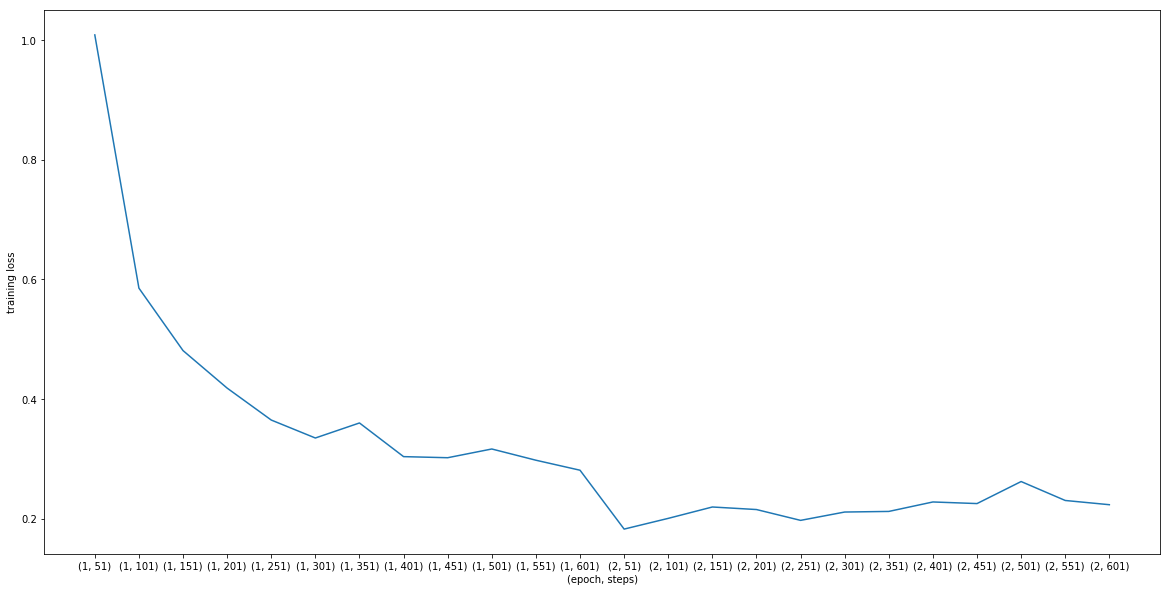

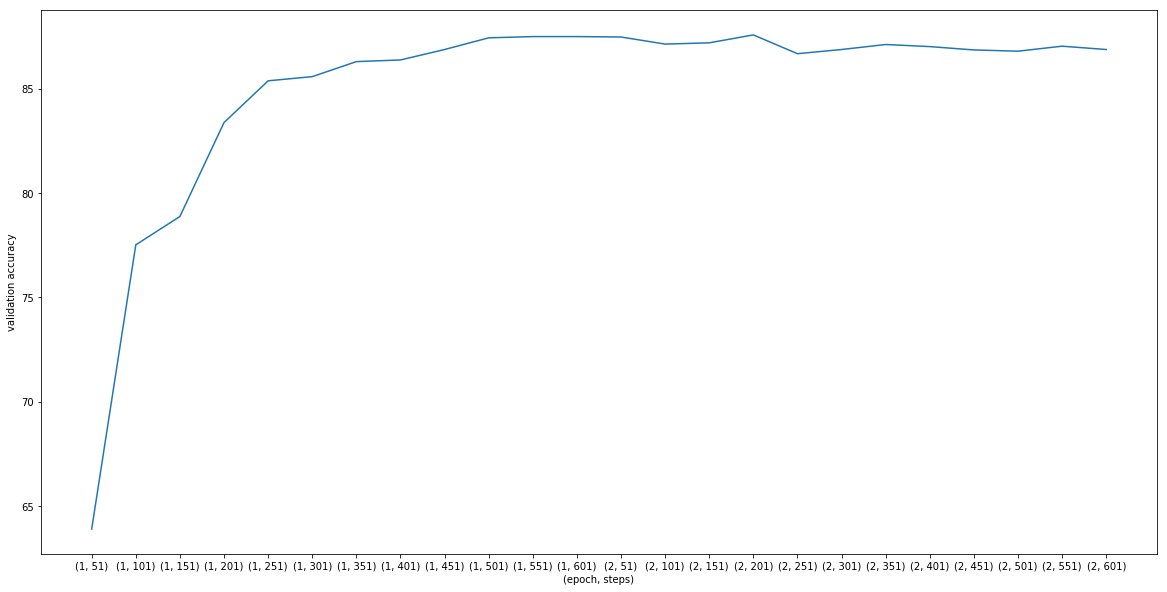

without post-processing
Epoch: [1/2], Step: [51/625], trainning loss: 1.0194610941410065, Validation Acc: 58.26
Epoch: [1/2], Step: [101/625], trainning loss: 0.6108263844251632, Validation Acc: 78.04
Epoch: [1/2], Step: [151/625], trainning loss: 0.4760869413614273, Validation Acc: 80.42
Epoch: [1/2], Step: [201/625], trainning loss: 0.41359049916267393, Validation Acc: 82.3
Epoch: [1/2], Step: [251/625], trainning loss: 0.36296339720487597, Validation Acc: 84.2
Epoch: [1/2], Step: [301/625], trainning loss: 0.37343343466520307, Validation Acc: 85.74
Epoch: [1/2], Step: [351/625], trainning loss: 0.35416661232709884, Validation Acc: 84.92
Epoch: [1/2], Step: [401/625], trainning loss: 0.3304072692990303, Validation Acc: 85.42
Epoch: [1/2], Step: [451/625], trainning loss: 0.3278919091820717, Validation Acc: 85.72
Epoch: [1/2], Step: [501/625], trainning loss: 0.31388366639614107, Validation Acc: 87.38
Epoch: [1/2], Step: [551/625], trainning loss: 0.29072337806224824, Validation Acc: 

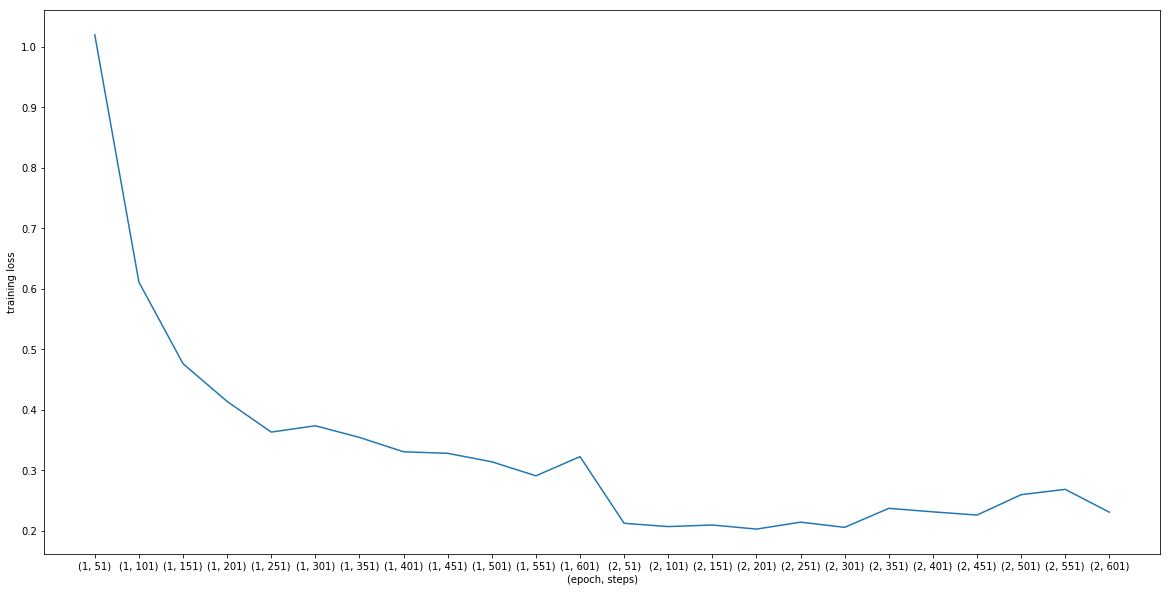

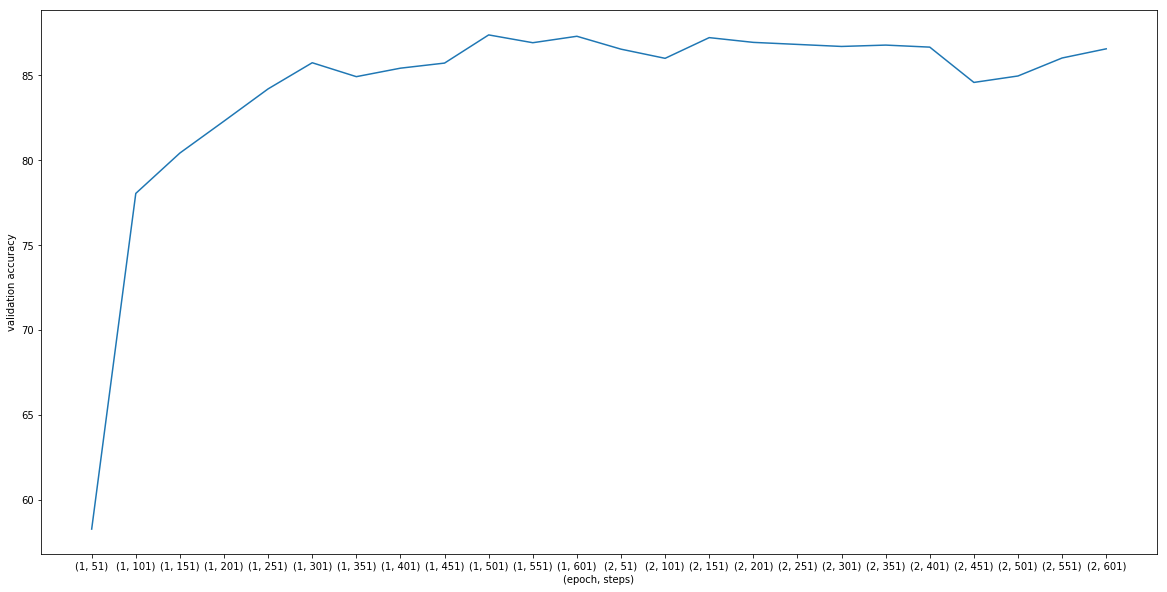

In [45]:
# set default
MAX_SENTENCE_LENGTH = 200
max_vocab_default = 10000
emb_dim_default = 100
lr_default = 0.01
num_epochs_default = 2
BATCH_SIZE = 32
n_gram_default = 1

# tune tokenization
print("Tune tokenization")
print("with post-processing")
token2id, id2token = build_vocab(n_gram_default, all_train_tokens,max_vocab_default)
train_data_indices = token2index_dataset(train_data_tokens,token2id)
val_data_indices = token2index_dataset(val_data_tokens, token2id)

# prepare data with dataloader for model
train_dataset = NewsGroupDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=newsgroup_collate_func,
                                       shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)
# run
val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
print ("Val Acc {}".format(val_acc_i))

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), train_loss)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("training loss")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), val_accuracy)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("validation accuracy")
plt.show()




print("without post-processing")
token2id, id2token = build_vocab(n_gram_default, all_train_tokens_raw,max_vocab_default)
train_data_indices = token2index_dataset(train_data_tokens_raw,token2id)
val_data_indices = token2index_dataset(val_data_tokens_raw, token2id)

# prepare data with dataloader for model
train_dataset = NewsGroupDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=newsgroup_collate_func,
                                       shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)
# run
val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
print ("Val Acc {}".format(val_acc_i))

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), train_loss)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("training loss")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(range(len(epoch_list)), val_accuracy)
plt.xticks(range(len(epoch_list)), epoch_list)
plt.xlabel("(epoch, steps)")
plt.ylabel("validation accuracy")
plt.show()



Tuning n-gram:
['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
n-gram:  1
Epoch: [1/2], Step: [51/625], trainning loss: 0.9743309426307678, Validation Acc: 69.04
Epoch: [1/2], Step

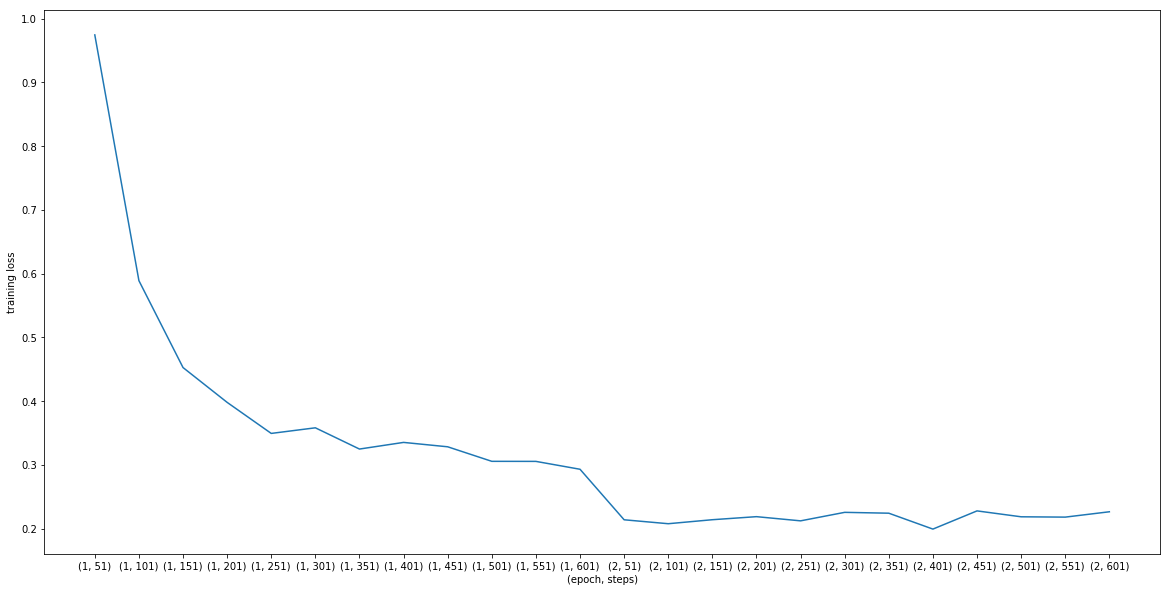

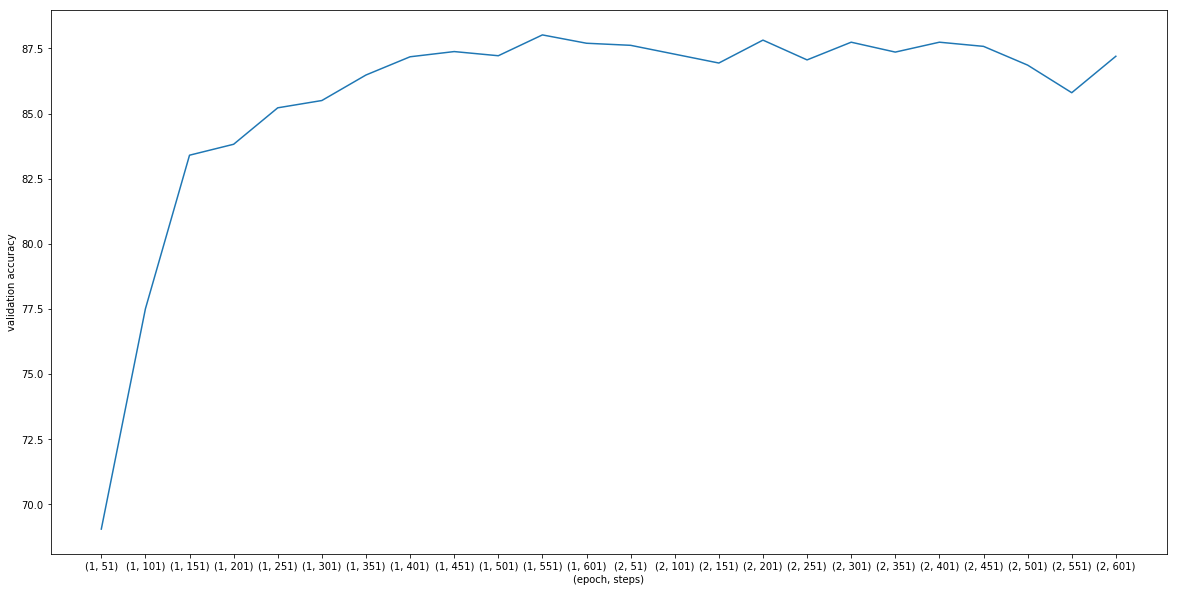

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt', 'for a', 'a movie', 'movie that', 'that gets', 'gets no', 'no respect', 'respect there', 'there sure', 'sure are', 'are a', 'a lot', 'lot of', 'of memorable', 'memorable quotes', 'quotes listed', 'listed for', 'for this', 'this gem', 'gem imagine', 'imagine a', 'a movie', 'movie where', 'where joe', 'joe piscopo', 'piscopo is', 'is actually', 'actually funny', 'funny maureen', 'maureen stapleton', 'stapleton is', 'is a', 'a scene', 'scene stealer', 'stealer the', 'the moroni', 'moroni character', 'character is', 'is an', 'an absolute', 'absolute scream', 'scre

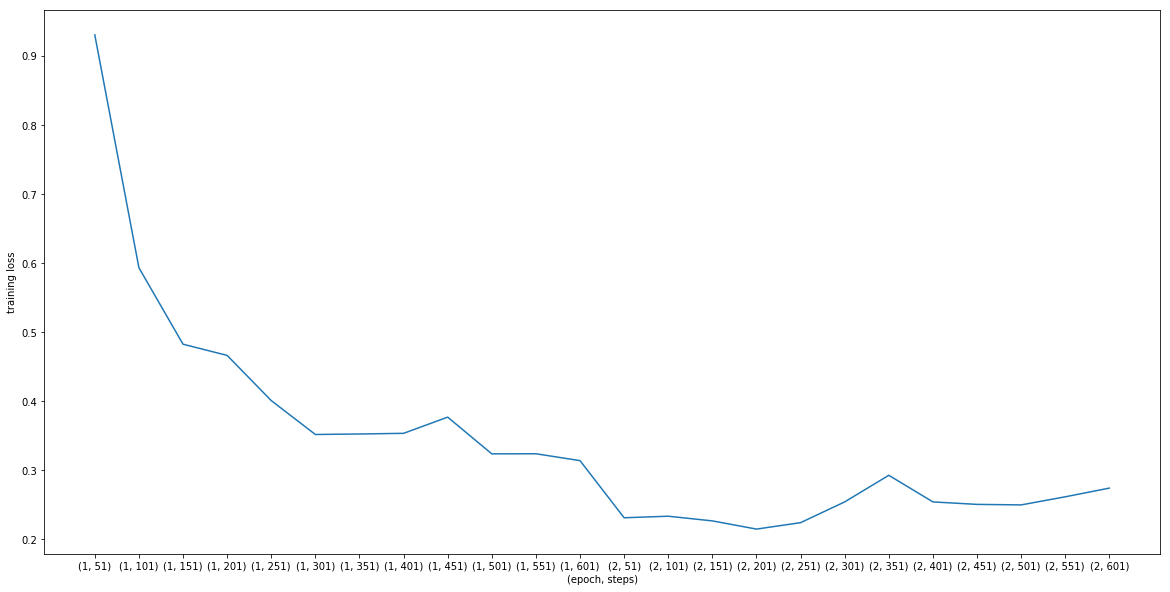

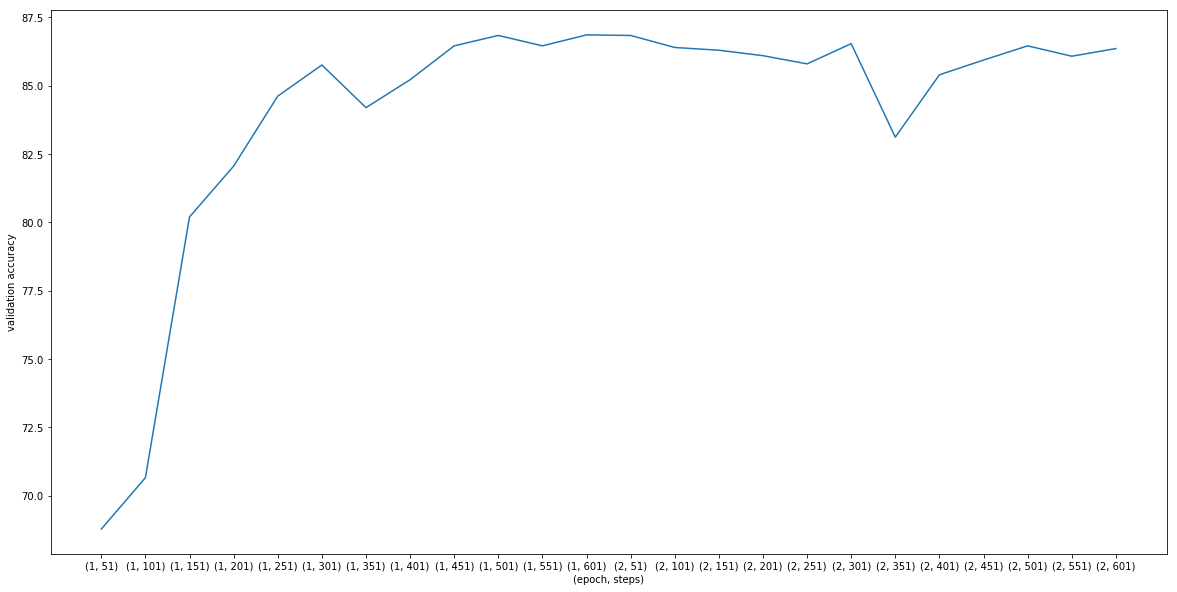

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt', 'for a', 'a movie', 'movie that', 'that gets', 'gets no', 'no respect', 'respect there', 'there sure', 'sure are', 'are a', 'a lot', 'lot of', 'of memorable', 'memorable quotes', 'quotes listed', 'listed for', 'for this', 'this gem', 'gem imagine', 'imagine a', 'a movie', 'movie where', 'where joe', 'joe piscopo', 'piscopo is', 'is actually', 'actually funny', 'funny maureen', 'maureen stapleton', 'stapleton is', 'is a', 'a scene', 'scene stealer', 'stealer the', 'the moroni', 'moroni character', 'character is', 'is an', 'an absolute', 'absolute scream', 'scre

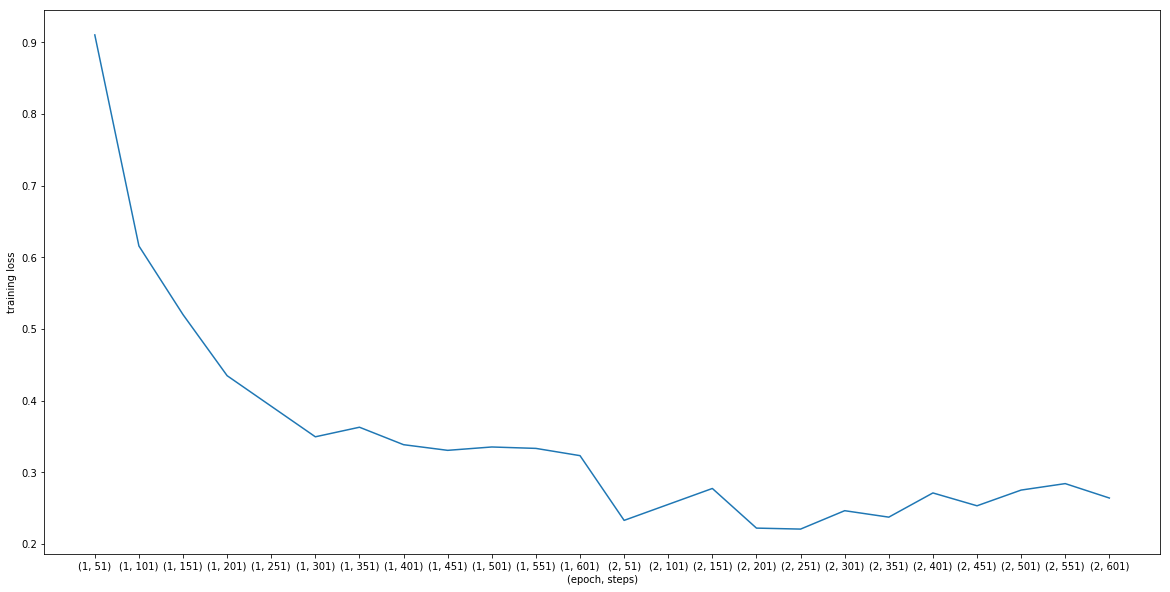

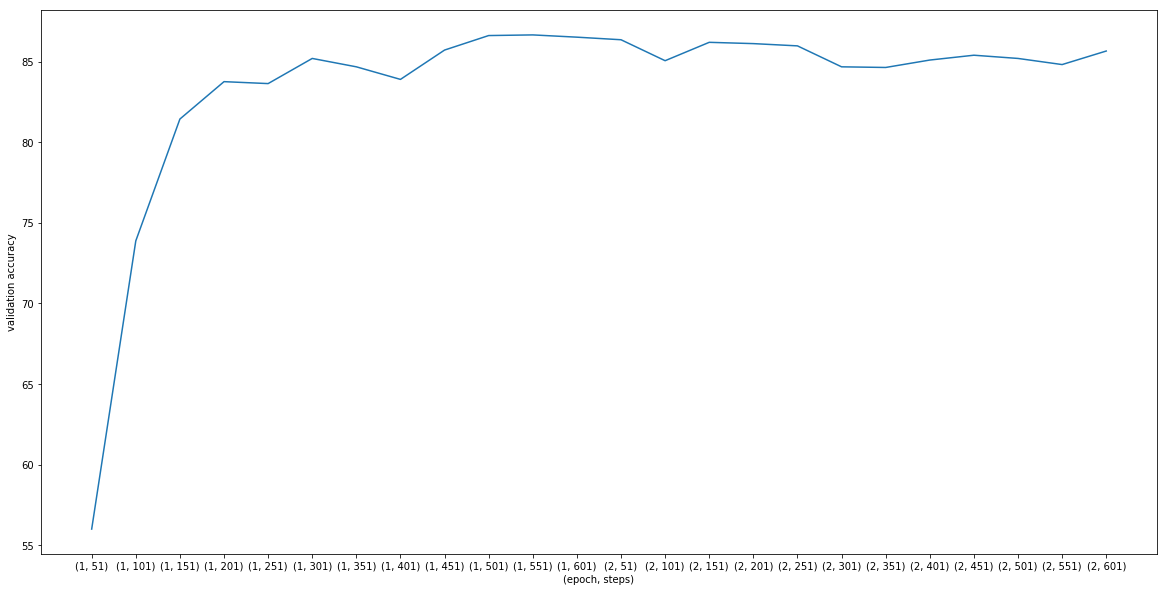

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt', 'for a', 'a movie', 'movie that', 'that gets', 'gets no', 'no respect', 'respect there', 'there sure', 'sure are', 'are a', 'a lot', 'lot of', 'of memorable', 'memorable quotes', 'quotes listed', 'listed for', 'for this', 'this gem', 'gem imagine', 'imagine a', 'a movie', 'movie where', 'where joe', 'joe piscopo', 'piscopo is', 'is actually', 'actually funny', 'funny maureen', 'maureen stapleton', 'stapleton is', 'is a', 'a scene', 'scene stealer', 'stealer the', 'the moroni', 'moroni character', 'character is', 'is an', 'an absolute', 'absolute scream', 'scre

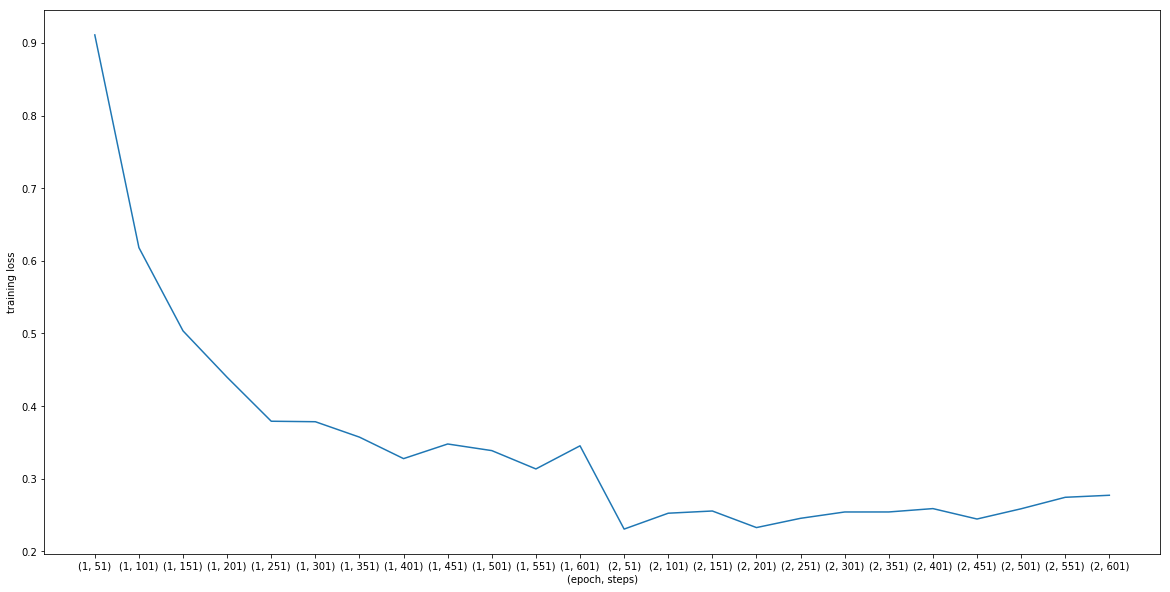

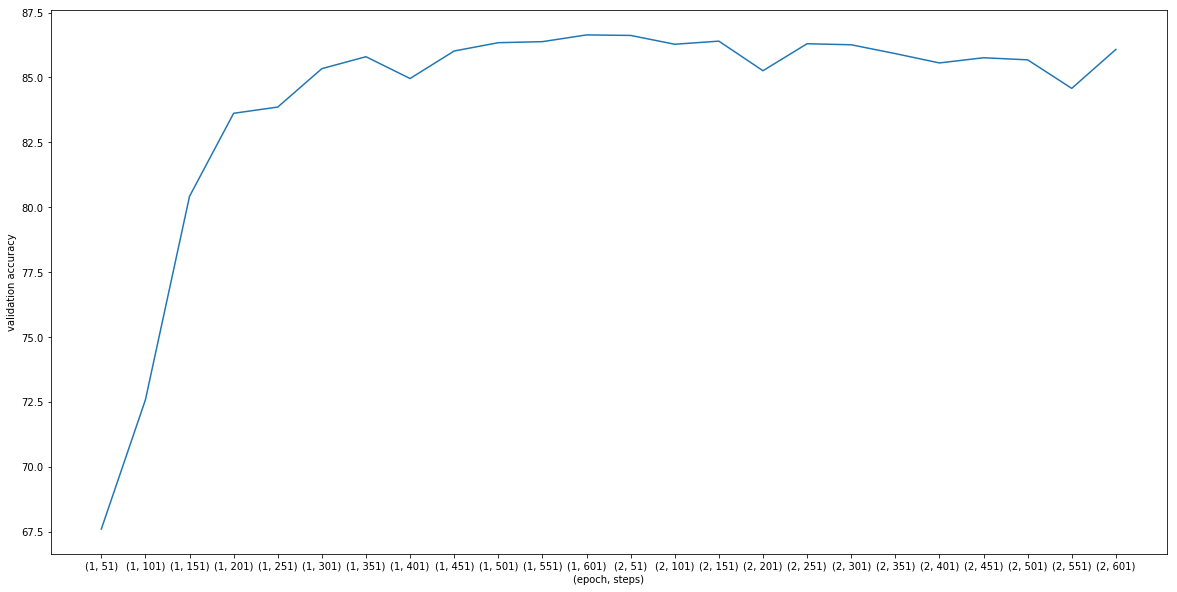

In [134]:
# tune n-gram with post-processing since having better result compare to without post-processing with all other parameters fixed
def tune_n_gram(n_size):   
    
    new_train = []
    new_val = []
    max_val_acc = -1
    best_n = -1
    train_size = len(train_data_tokens)
    val_size = len(val_data_tokens)
    
    
    # tune n-gram
    print("Tuning n-gram:")
    for n_i in range(1,n_size+1):
        # build vocab
        token2id, id2token = build_vocab(n_i, all_train_tokens,max_vocab_default)
        if n_i == 1:
            new_train = copy.deepcopy(train_data_tokens)
            new_val = copy.deepcopy(val_data_tokens)
        else:
            for idx in range(train_size):
                new_train[idx] += train_token_list[n_i-2][idx]
            for idx in range(val_size):
                new_val[idx] += val_token_list[n_i -2][idx]
        
        print(new_train[0])
        print(train_data_tokens[0])
        # get indices
        train_data_indices = token2index_dataset(new_train,token2id)
        val_data_indices = token2index_dataset(new_val, token2id)
        
        # prepare data with dataloader for model
        train_dataset = NewsGroupDataset(train_data_indices, train_target)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)
        
        val_dataset = NewsGroupDataset(val_data_indices, val_target)
        val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=newsgroup_collate_func,
                                                   shuffle=True)
                
        # run
        print("n-gram: ", n_i)        
        
        val_acc_i, train_loss, val_accuracy, epoch_list= run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))
        
        # plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()

        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_n = n_i
            
    return best_n

best_n = tune_n_gram(4)

In [135]:
best_n

1

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
['this', 'film', 'is', 'far', 'and', 'wide', 'and', 'beyond', 'any', 'shadow', 'of', 'a', 'doubt', 'the', 'single', 'worst', 'and', 'most', 'contemptible', 'film', 'in', 'the', 'history', 'of', 'the', 'universe.<br', '/><br', '/>it', 'really', 'is', 'that', 'bad.<br', '/><br', '/>personally', 'i', 'have', 'always', 'enjoyed', 'the', 'guilty', 'pleasure', 'of', 'a', 'terrible', 'film', 'and', 'rented', 'this', 'one', 'thinking', 'it', 'would', 'be', 'one', 'of', 'those', 'to', 'my', 'immense', 'disappointment', 'it', 'was', 'not.<br', '/><br', '/>the', 'script'

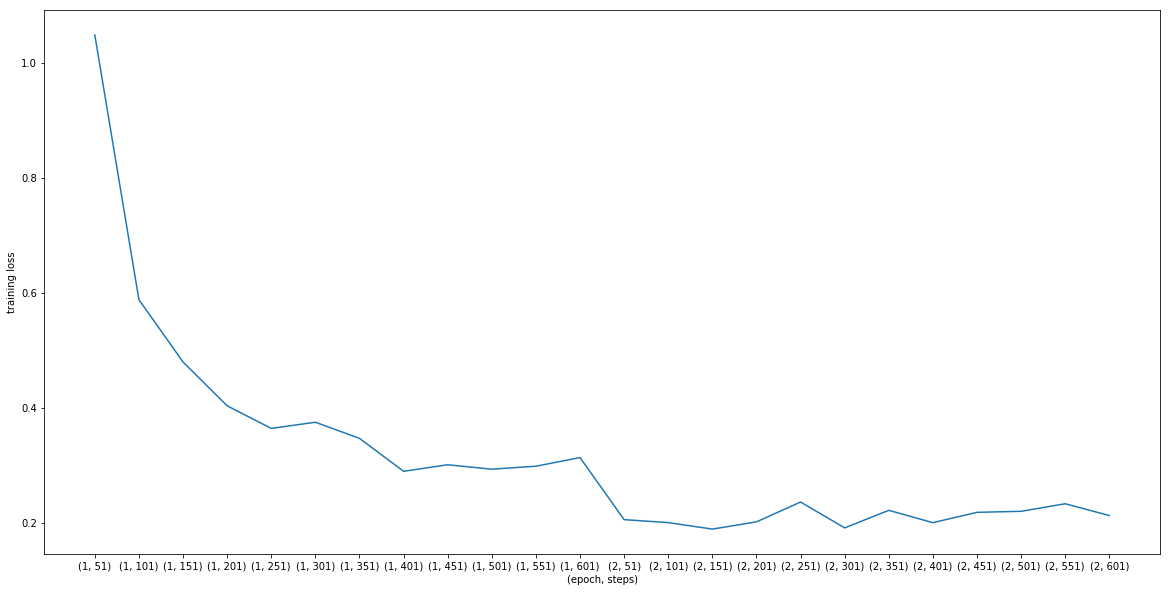

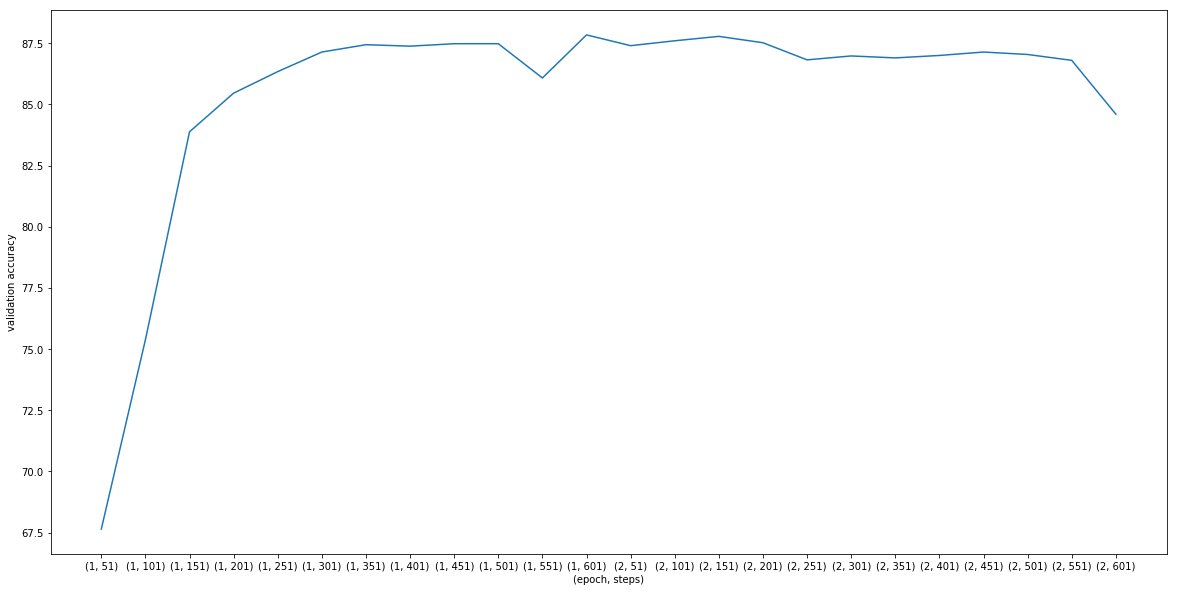

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
['this', 'film', 'is', 'far', 'and', 'wide', 'and', 'beyond', 'any', 'shadow', 'of', 'a', 'doubt', 'the', 'single', 'worst', 'and', 'most', 'contemptible', 'film', 'in', 'the', 'history', 'of', 'the', 'universe.<br', '/><br', '/>it', 'really', 'is', 'that', 'bad.<br', '/><br', '/>personally', 'i', 'have', 'always', 'enjoyed', 'the', 'guilty', 'pleasure', 'of', 'a', 'terrible', 'film', 'and', 'rented', 'this', 'one', 'thinking', 'it', 'would', 'be', 'one', 'of', 'those', 'to', 'my', 'immense', 'disappointment', 'it', 'was', 'not.<br', '/><br', '/>the', 'script'

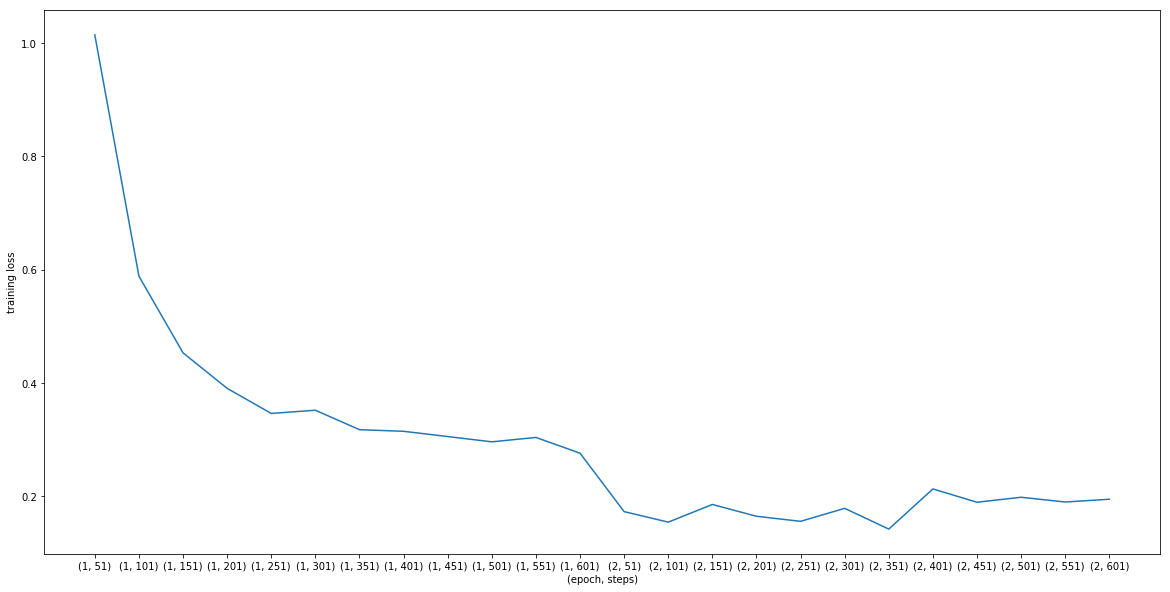

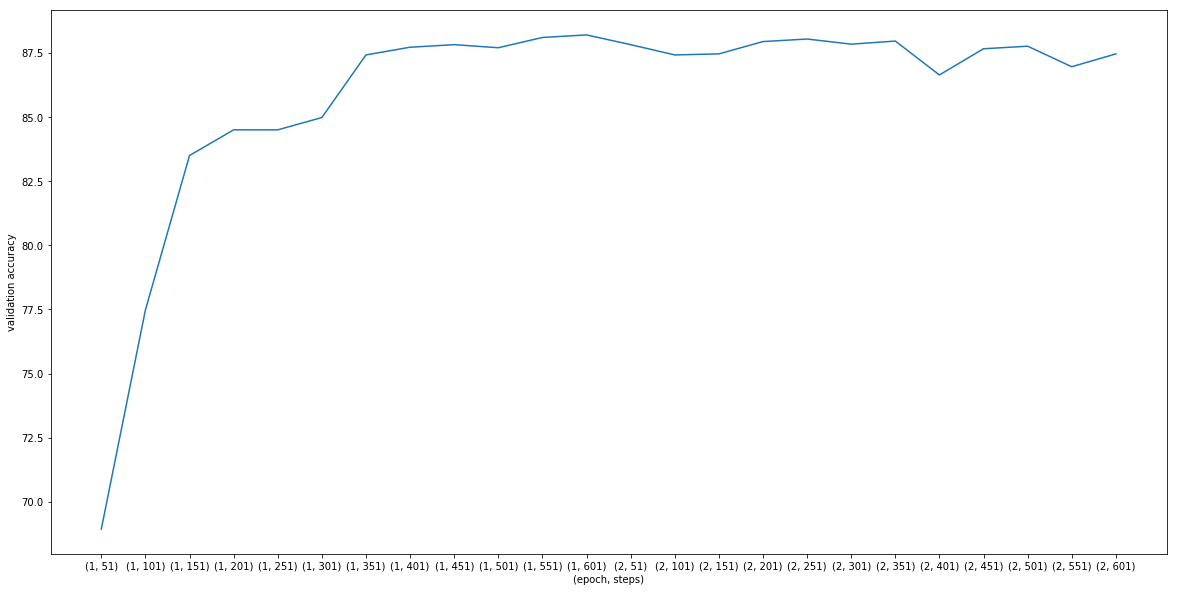

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
['this', 'film', 'is', 'far', 'and', 'wide', 'and', 'beyond', 'any', 'shadow', 'of', 'a', 'doubt', 'the', 'single', 'worst', 'and', 'most', 'contemptible', 'film', 'in', 'the', 'history', 'of', 'the', 'universe.<br', '/><br', '/>it', 'really', 'is', 'that', 'bad.<br', '/><br', '/>personally', 'i', 'have', 'always', 'enjoyed', 'the', 'guilty', 'pleasure', 'of', 'a', 'terrible', 'film', 'and', 'rented', 'this', 'one', 'thinking', 'it', 'would', 'be', 'one', 'of', 'those', 'to', 'my', 'immense', 'disappointment', 'it', 'was', 'not.<br', '/><br', '/>the', 'script'

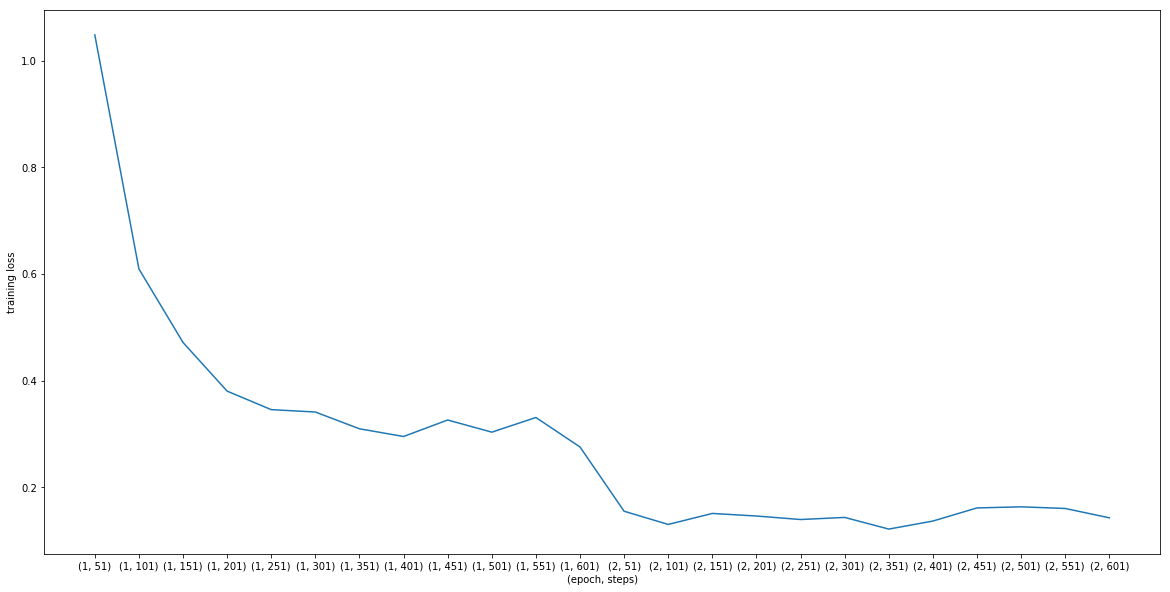

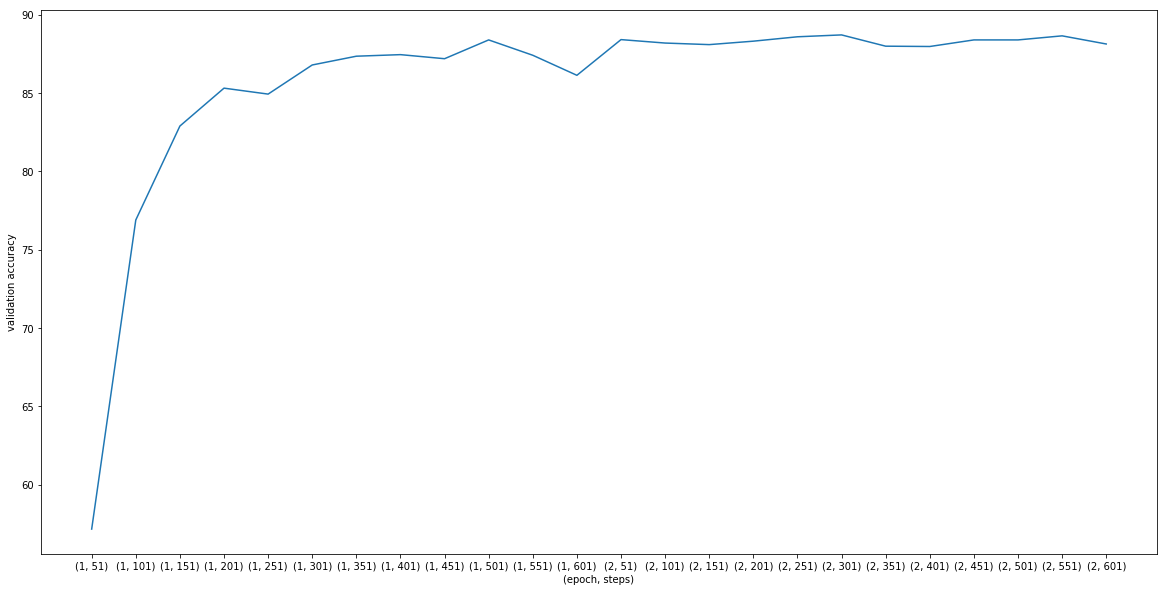

['for', 'a', 'movie', 'that', 'gets', 'no', 'respect', 'there', 'sure', 'are', 'a', 'lot', 'of', 'memorable', 'quotes', 'listed', 'for', 'this', 'gem', 'imagine', 'a', 'movie', 'where', 'joe', 'piscopo', 'is', 'actually', 'funny', 'maureen', 'stapleton', 'is', 'a', 'scene', 'stealer', 'the', 'moroni', 'character', 'is', 'an', 'absolute', 'scream', 'watch', 'for', 'alan', 'the', 'skipper', 'hale', 'jr', 'as', 'a', 'police', 'sgt']
['this', 'film', 'is', 'far', 'and', 'wide', 'and', 'beyond', 'any', 'shadow', 'of', 'a', 'doubt', 'the', 'single', 'worst', 'and', 'most', 'contemptible', 'film', 'in', 'the', 'history', 'of', 'the', 'universe.<br', '/><br', '/>it', 'really', 'is', 'that', 'bad.<br', '/><br', '/>personally', 'i', 'have', 'always', 'enjoyed', 'the', 'guilty', 'pleasure', 'of', 'a', 'terrible', 'film', 'and', 'rented', 'this', 'one', 'thinking', 'it', 'would', 'be', 'one', 'of', 'those', 'to', 'my', 'immense', 'disappointment', 'it', 'was', 'not.<br', '/><br', '/>the', 'script'

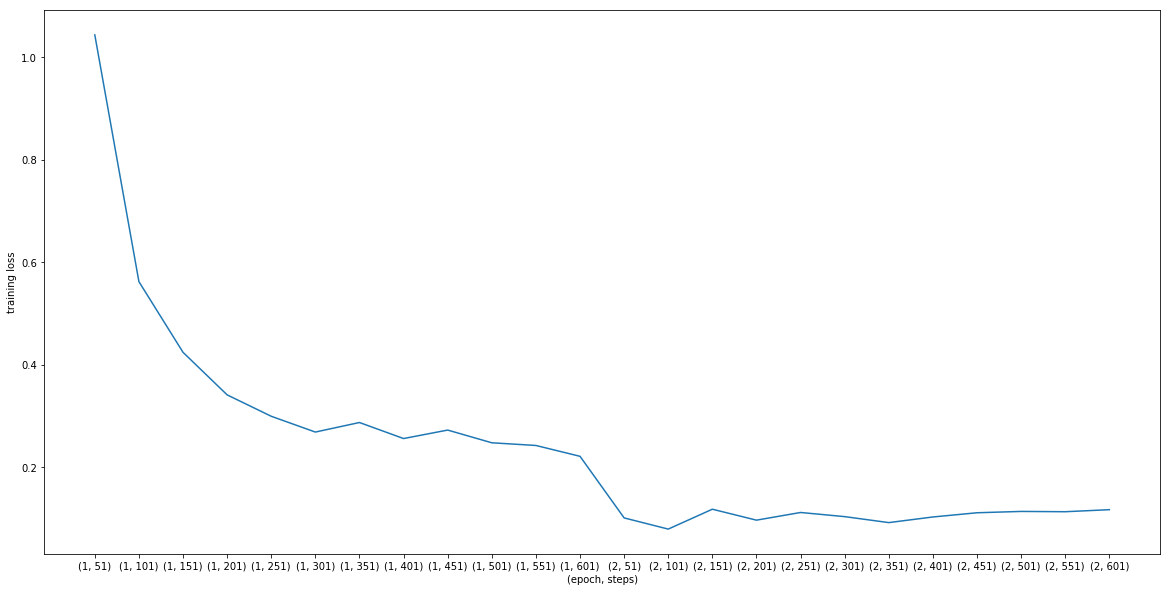

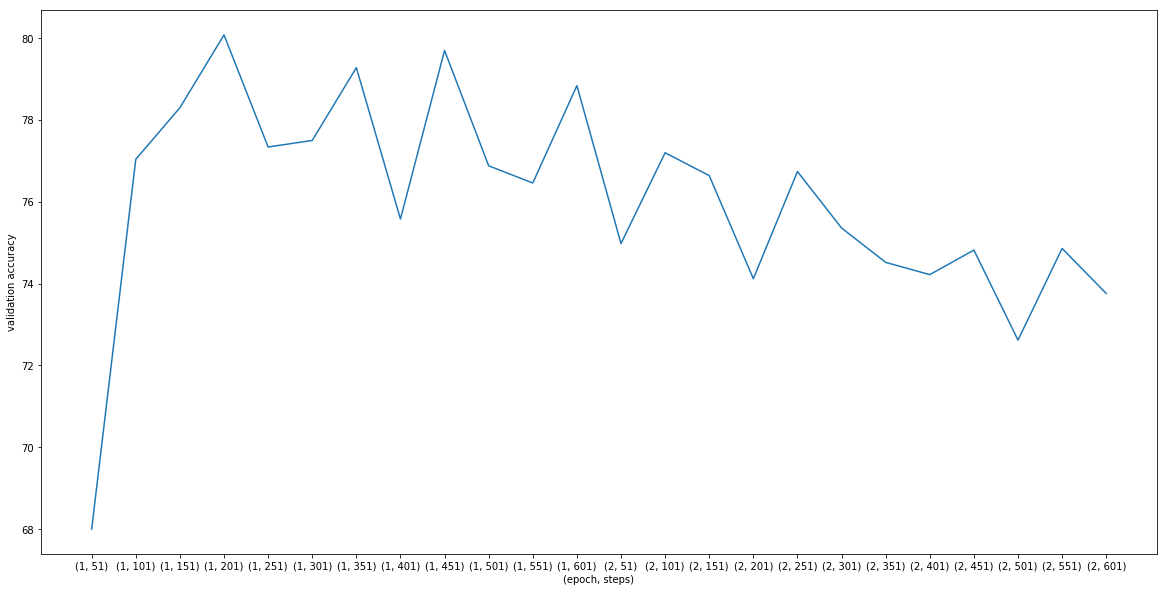

In [136]:
def tune_vocab_size(vocab_size_list):  
    # set initials
    new_train = []
    new_val = []
    max_val_acc = -1
    best_vocab_size = -1
    train_size = len(train_data_tokens)
    val_size = len(val_data_tokens)
    test_size = len(test_data_tokens)
    
    # tune n-gram
    for v_s in vocab_size_list:
        # get tokens+build vocab
        for n_i in range(1,best_n):
            for idx in range(train_size):
                train_data_tokens[idx] += train_token_list[n_i-2][idx]
            for idx in range(val_size):
                val_data_tokens[idx] += val_token_list[n_i -2][idx]
            for idx in range(test_size):
                test_data_tokens[idx] += test_token_list[n_i -2][idx]
                
        print(train_data_tokens[0])
        print(val_data_tokens[0])
        token2id, id2token = build_vocab(best_n, all_train_tokens,v_s)
        train_data_indices = token2index_dataset(train_data_tokens,token2id)
        val_data_indices = token2index_dataset(val_data_tokens, token2id)

        # prepare data with dataloader for model
        train_dataset = NewsGroupDataset(train_data_indices, train_target)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

        val_dataset = NewsGroupDataset(val_data_indices, val_target)
        val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                                   batch_size=BATCH_SIZE,
                                                   collate_fn=newsgroup_collate_func,
                                                   shuffle=True)


        # run
        print("current max vocab size: ", v_s)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_dim_default, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()

        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_vocab_size = v_s 
    return best_vocab_size
    

best_vocab_size = tune_vocab_size([10000,20000,50000,80000])

In [144]:
best_vocab_size

50000

In [150]:
token2id, id2token = build_vocab(best_n, all_train_tokens,best_vocab_size)
train_data_indices = token2index_dataset(train_data_tokens,token2id)
val_data_indices = token2index_dataset(val_data_tokens, token2id)
test_data_indices = token2index_dataset(test_data_tokens, token2id)


# prepare data with dataloader for model
train_dataset = NewsGroupDataset(train_data_indices, train_target)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=newsgroup_collate_func,
                                       shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_target)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_target)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                       batch_size=BATCH_SIZE,
                                       collate_fn=newsgroup_collate_func,
                                       shuffle=True)


In [152]:
# tune embedding dimension with best_n and best_vocab_size
def tune_emd_dim(emb_dim_size, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_emb = -1
    for emb_i in emb_dim_size:
        
        print("current embedding size: ", emb_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(emb_i, lr_default, num_epochs_default, train_loader, val_loader,id2token, optimizer_default)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_emb = emb_i
    return best_emb

current embedding size:  100
Epoch: [1/2], Step: [51/625], trainning loss: 1.073333239555359, Validation Acc: 63.9
Epoch: [1/2], Step: [101/625], trainning loss: 0.5877566814422608, Validation Acc: 78.14
Epoch: [1/2], Step: [151/625], trainning loss: 0.45120606243610384, Validation Acc: 83.8
Epoch: [1/2], Step: [201/625], trainning loss: 0.3682561281323433, Validation Acc: 85.06
Epoch: [1/2], Step: [251/625], trainning loss: 0.35431419759988786, Validation Acc: 86.56
Epoch: [1/2], Step: [301/625], trainning loss: 0.33746497124433517, Validation Acc: 86.54
Epoch: [1/2], Step: [351/625], trainning loss: 0.2931415295600891, Validation Acc: 86.08
Epoch: [1/2], Step: [401/625], trainning loss: 0.30967852801084517, Validation Acc: 85.6
Epoch: [1/2], Step: [451/625], trainning loss: 0.3097996711730957, Validation Acc: 87.14
Epoch: [1/2], Step: [501/625], trainning loss: 0.3068544834852219, Validation Acc: 86.82
Epoch: [1/2], Step: [551/625], trainning loss: 0.32608473777770997, Validation Acc

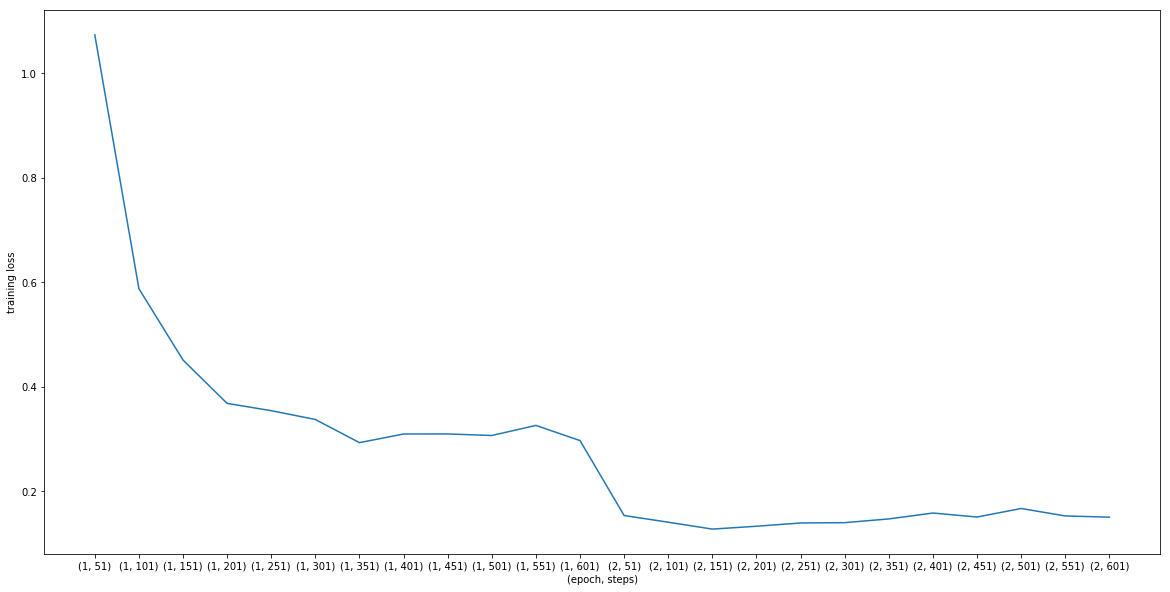

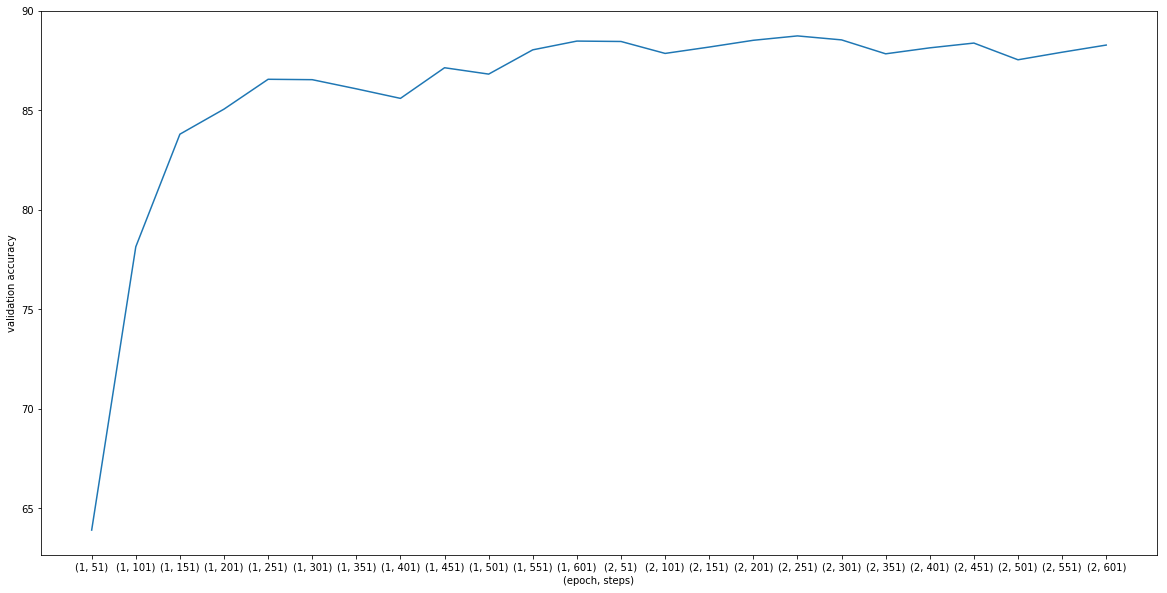

current embedding size:  200
Epoch: [1/2], Step: [51/625], trainning loss: 0.9202183187007904, Validation Acc: 54.6
Epoch: [1/2], Step: [101/625], trainning loss: 0.5407234734296799, Validation Acc: 80.12
Epoch: [1/2], Step: [151/625], trainning loss: 0.43170538544654846, Validation Acc: 85.26
Epoch: [1/2], Step: [201/625], trainning loss: 0.35971610486507416, Validation Acc: 86.94
Epoch: [1/2], Step: [251/625], trainning loss: 0.32265537440776826, Validation Acc: 87.44
Epoch: [1/2], Step: [301/625], trainning loss: 0.32843895733356476, Validation Acc: 87.94
Epoch: [1/2], Step: [351/625], trainning loss: 0.315304713845253, Validation Acc: 88.2
Epoch: [1/2], Step: [401/625], trainning loss: 0.2866282321512699, Validation Acc: 87.2
Epoch: [1/2], Step: [451/625], trainning loss: 0.311643962264061, Validation Acc: 87.56
Epoch: [1/2], Step: [501/625], trainning loss: 0.2831196495890617, Validation Acc: 88.4
Epoch: [1/2], Step: [551/625], trainning loss: 0.2775857928395271, Validation Acc: 8

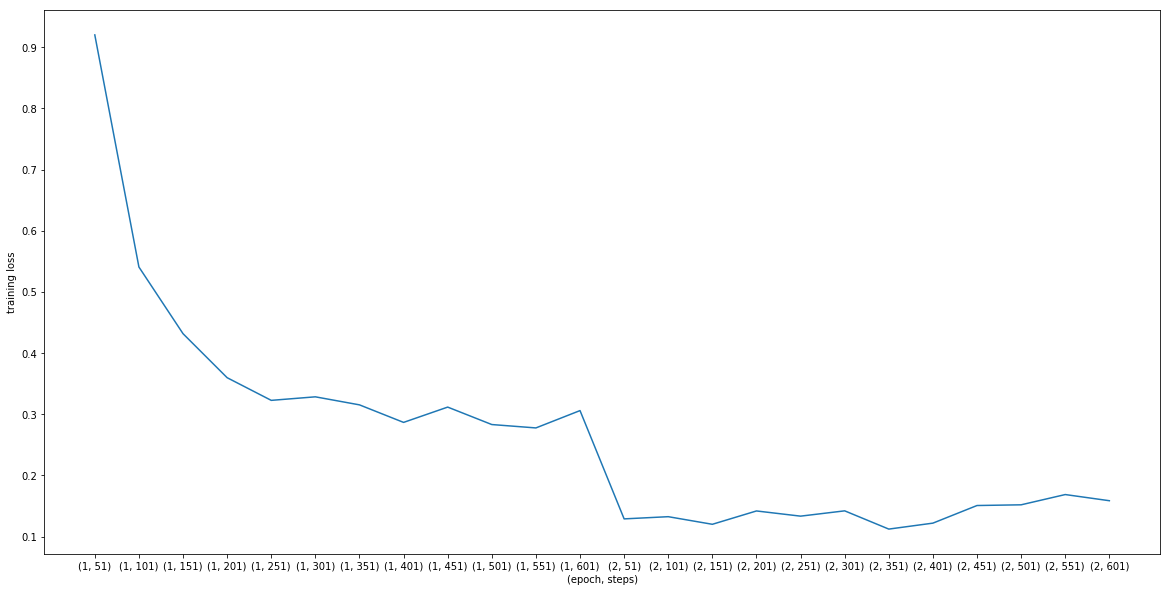

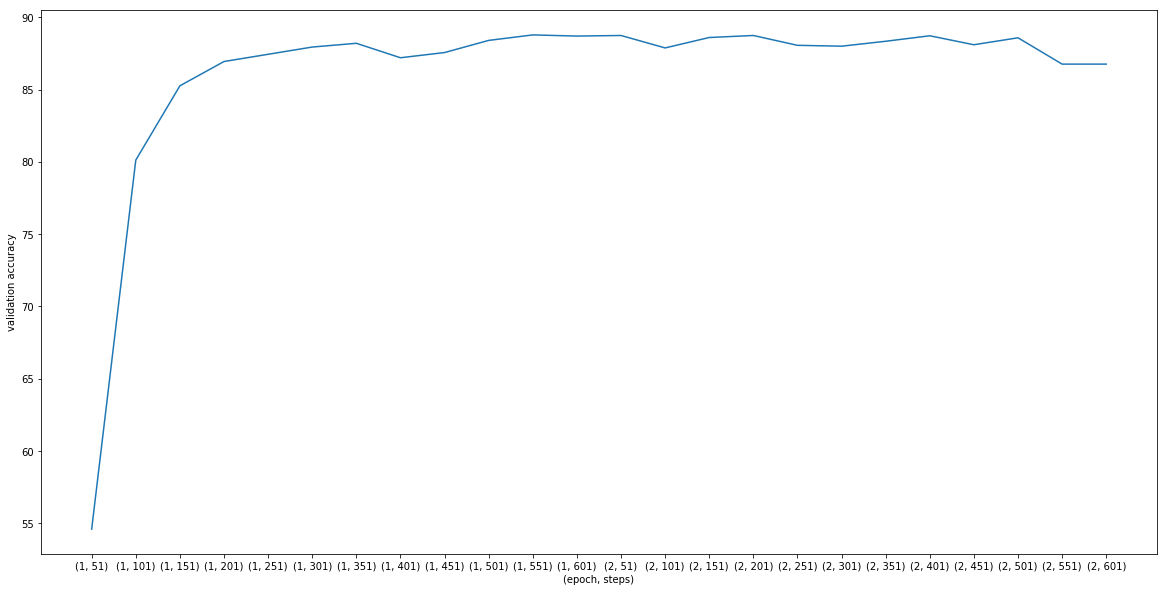

current embedding size:  500
Epoch: [1/2], Step: [51/625], trainning loss: 0.7462098759412765, Validation Acc: 74.72
Epoch: [1/2], Step: [101/625], trainning loss: 0.4296381613612175, Validation Acc: 83.64
Epoch: [1/2], Step: [151/625], trainning loss: 0.3925743636488914, Validation Acc: 84.94
Epoch: [1/2], Step: [201/625], trainning loss: 0.3551775208115578, Validation Acc: 85.88
Epoch: [1/2], Step: [251/625], trainning loss: 0.3335981011390686, Validation Acc: 86.92
Epoch: [1/2], Step: [301/625], trainning loss: 0.3287674403190613, Validation Acc: 85.28
Epoch: [1/2], Step: [351/625], trainning loss: 0.29998696386814117, Validation Acc: 86.62
Epoch: [1/2], Step: [401/625], trainning loss: 0.31713839292526247, Validation Acc: 86.06
Epoch: [1/2], Step: [451/625], trainning loss: 0.34369213730096815, Validation Acc: 87.04
Epoch: [1/2], Step: [501/625], trainning loss: 0.28845670849084853, Validation Acc: 87.6
Epoch: [1/2], Step: [551/625], trainning loss: 0.31374543815851214, Validation 

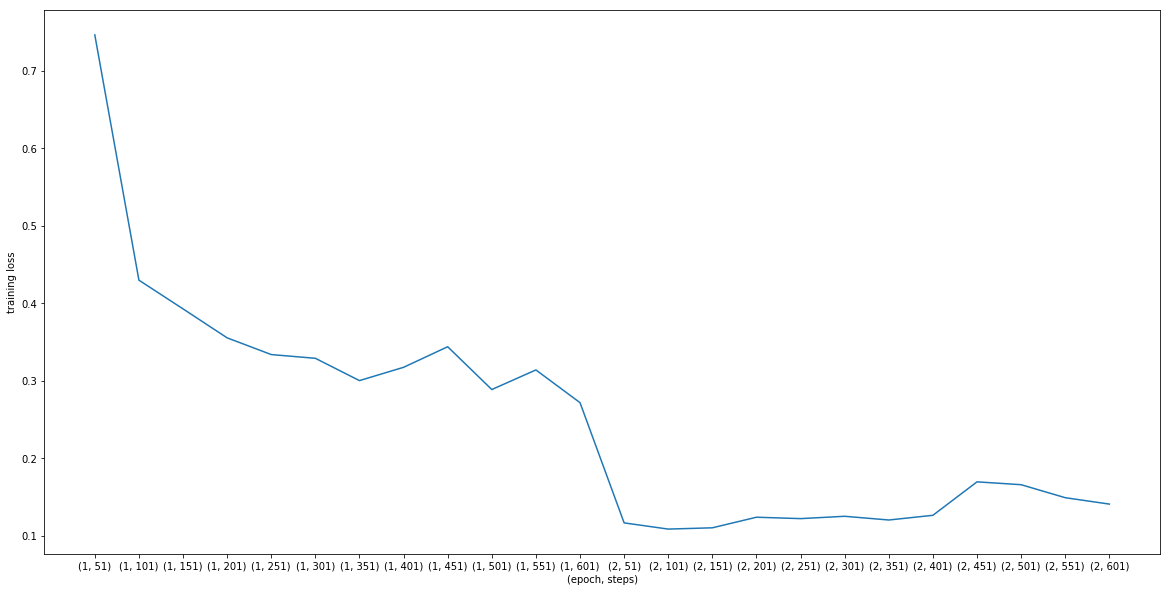

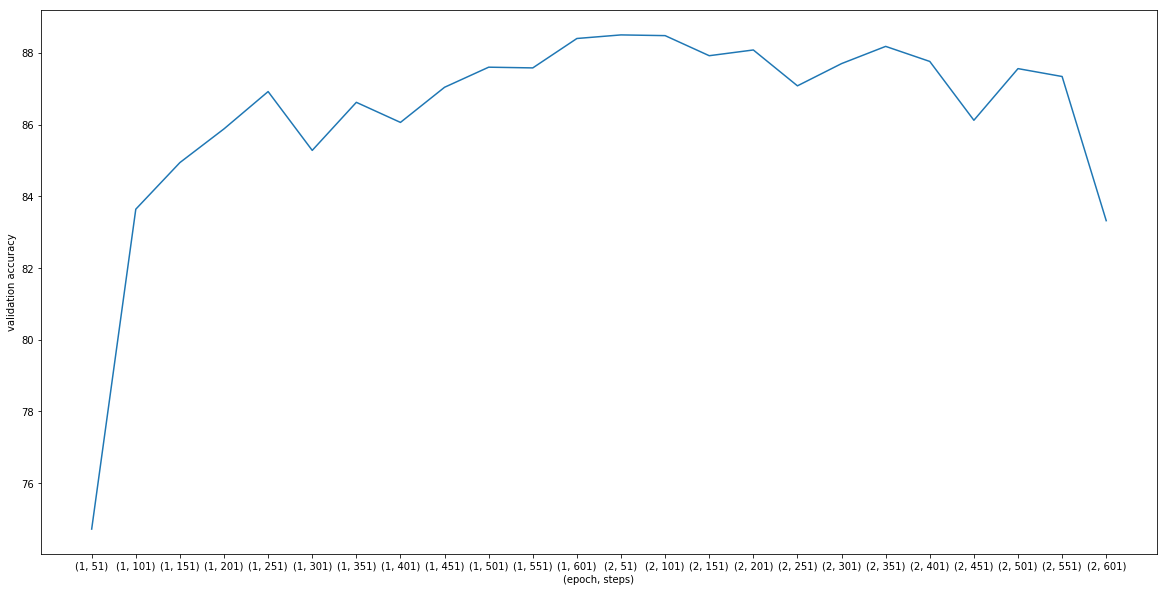

current embedding size:  800
Epoch: [1/2], Step: [51/625], trainning loss: 0.6617942571640014, Validation Acc: 70.14
Epoch: [1/2], Step: [101/625], trainning loss: 0.43327647149562837, Validation Acc: 83.54
Epoch: [1/2], Step: [151/625], trainning loss: 0.36369379341602326, Validation Acc: 85.34
Epoch: [1/2], Step: [201/625], trainning loss: 0.3619118028879166, Validation Acc: 84.0
Epoch: [1/2], Step: [251/625], trainning loss: 0.4081790578365326, Validation Acc: 85.6
Epoch: [1/2], Step: [301/625], trainning loss: 0.30276861250400544, Validation Acc: 87.12
Epoch: [1/2], Step: [351/625], trainning loss: 0.35013926923274996, Validation Acc: 86.78
Epoch: [1/2], Step: [401/625], trainning loss: 0.32860454231500624, Validation Acc: 86.98
Epoch: [1/2], Step: [451/625], trainning loss: 0.3270925560593605, Validation Acc: 86.78
Epoch: [1/2], Step: [501/625], trainning loss: 0.3069249926507473, Validation Acc: 85.5
Epoch: [1/2], Step: [551/625], trainning loss: 0.31980713695287705, Validation A

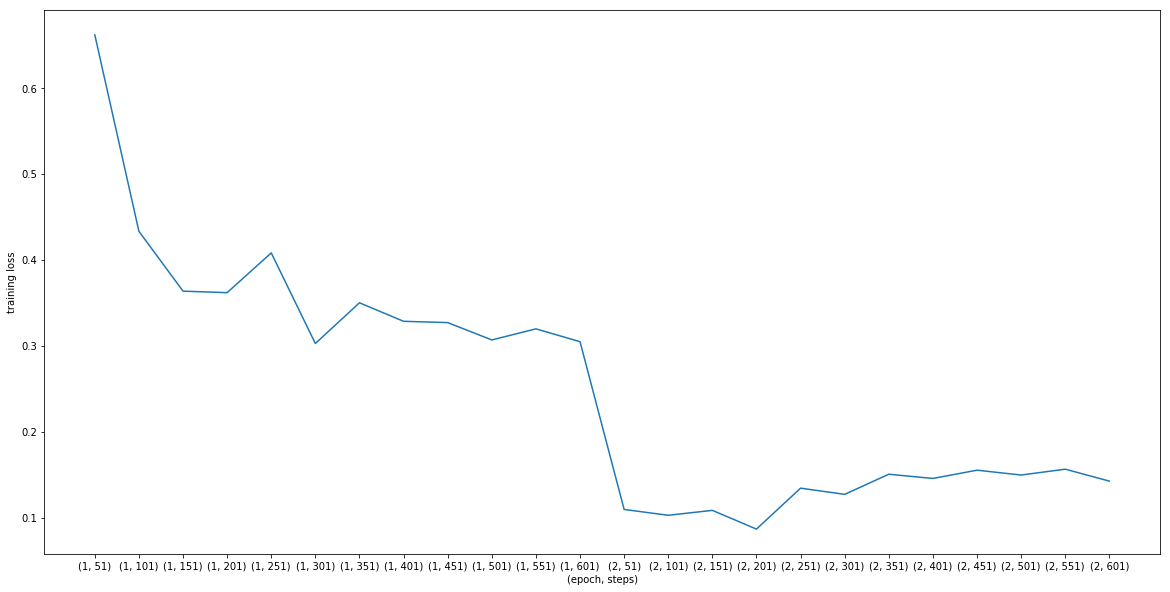

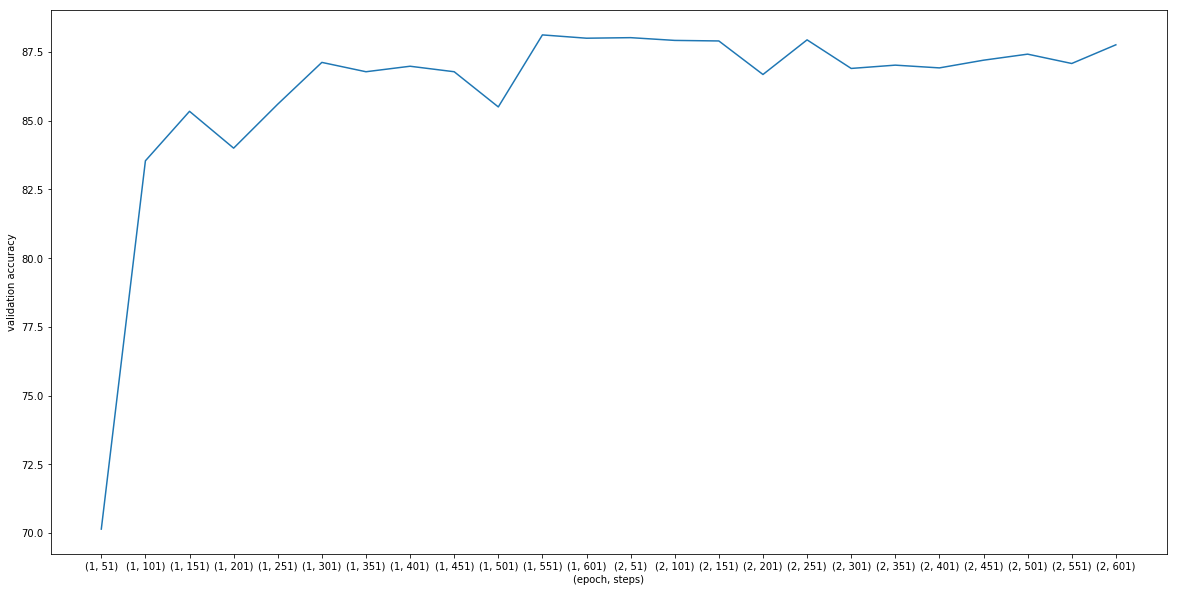

In [153]:
emb_dim_size = [100,200,500,800]
best_emb = tune_emd_dim(emb_dim_size, train_loader, val_loader, id2token)

In [154]:
best_emb

100

In [157]:
def tune_optimizer(optimizer_lst, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_opt = -1
    for opt_i in optimizer_lst:
        
        print("current optimizer: ", opt_i)
        print(best_emb)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, lr_default, num_epochs_default, train_loader, val_loader,id2token, opt_i)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_opt = opt_i
    return best_opt

current optimizer:  adam
100
Epoch: [1/2], Step: [51/625], trainning loss: 1.046556853055954, Validation Acc: 62.4
Epoch: [1/2], Step: [101/625], trainning loss: 0.599859372973442, Validation Acc: 65.08
Epoch: [1/2], Step: [151/625], trainning loss: 0.4644308477640152, Validation Acc: 82.42
Epoch: [1/2], Step: [201/625], trainning loss: 0.3925604170560837, Validation Acc: 84.96
Epoch: [1/2], Step: [251/625], trainning loss: 0.33457983762025834, Validation Acc: 85.86
Epoch: [1/2], Step: [301/625], trainning loss: 0.3434066858887672, Validation Acc: 87.18
Epoch: [1/2], Step: [351/625], trainning loss: 0.31678091138601305, Validation Acc: 86.44
Epoch: [1/2], Step: [401/625], trainning loss: 0.3154413831233978, Validation Acc: 87.96
Epoch: [1/2], Step: [451/625], trainning loss: 0.34977467119693756, Validation Acc: 87.9
Epoch: [1/2], Step: [501/625], trainning loss: 0.2750842618942261, Validation Acc: 87.98
Epoch: [1/2], Step: [551/625], trainning loss: 0.3002278456091881, Validation Acc: 

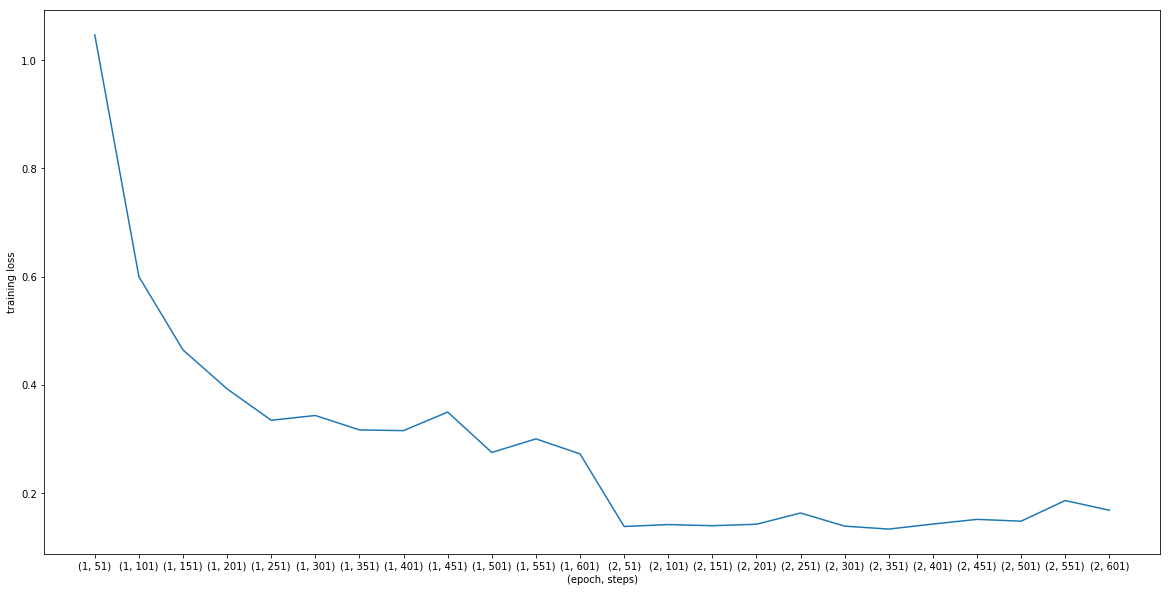

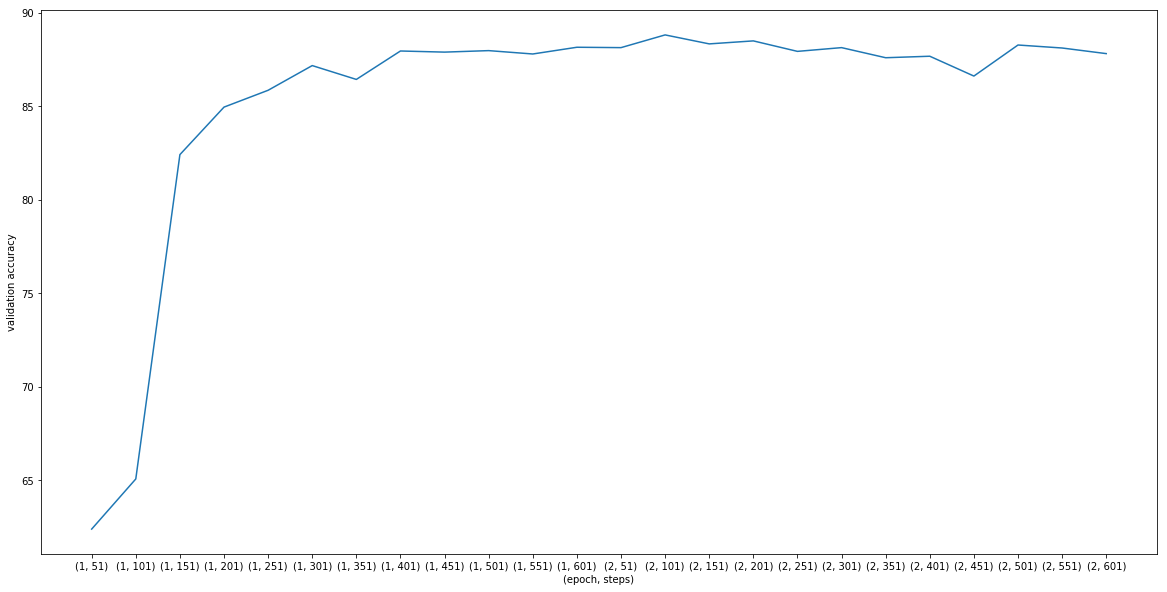

current optimizer:  sgd
100
Epoch: [1/2], Step: [51/625], trainning loss: 2.876491889953613, Validation Acc: 51.6
Epoch: [1/2], Step: [101/625], trainning loss: 2.41652792930603, Validation Acc: 51.98
Epoch: [1/2], Step: [151/625], trainning loss: 2.0807748317718504, Validation Acc: 52.18
Epoch: [1/2], Step: [201/625], trainning loss: 1.804609785079956, Validation Acc: 52.78
Epoch: [1/2], Step: [251/625], trainning loss: 1.5862728929519654, Validation Acc: 54.02
Epoch: [1/2], Step: [301/625], trainning loss: 1.419759795665741, Validation Acc: 54.34
Epoch: [1/2], Step: [351/625], trainning loss: 1.2915333485603333, Validation Acc: 54.58
Epoch: [1/2], Step: [401/625], trainning loss: 1.1897622871398925, Validation Acc: 55.2
Epoch: [1/2], Step: [451/625], trainning loss: 1.1153579998016356, Validation Acc: 55.86
Epoch: [1/2], Step: [501/625], trainning loss: 1.062656407356262, Validation Acc: 55.7
Epoch: [1/2], Step: [551/625], trainning loss: 1.014388667345047, Validation Acc: 55.78
Epoc

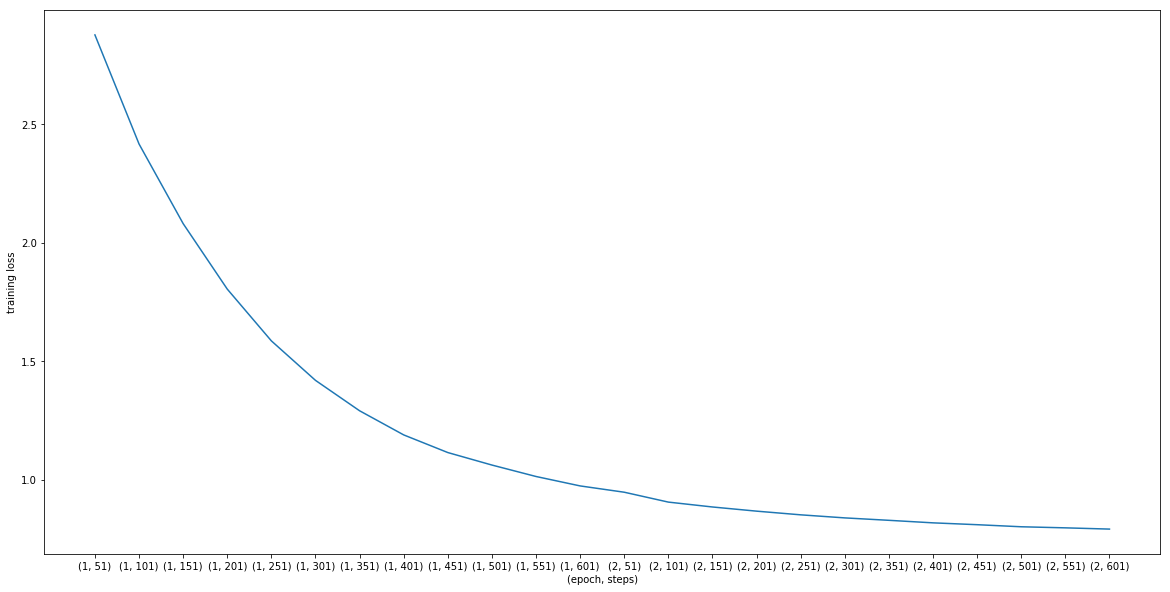

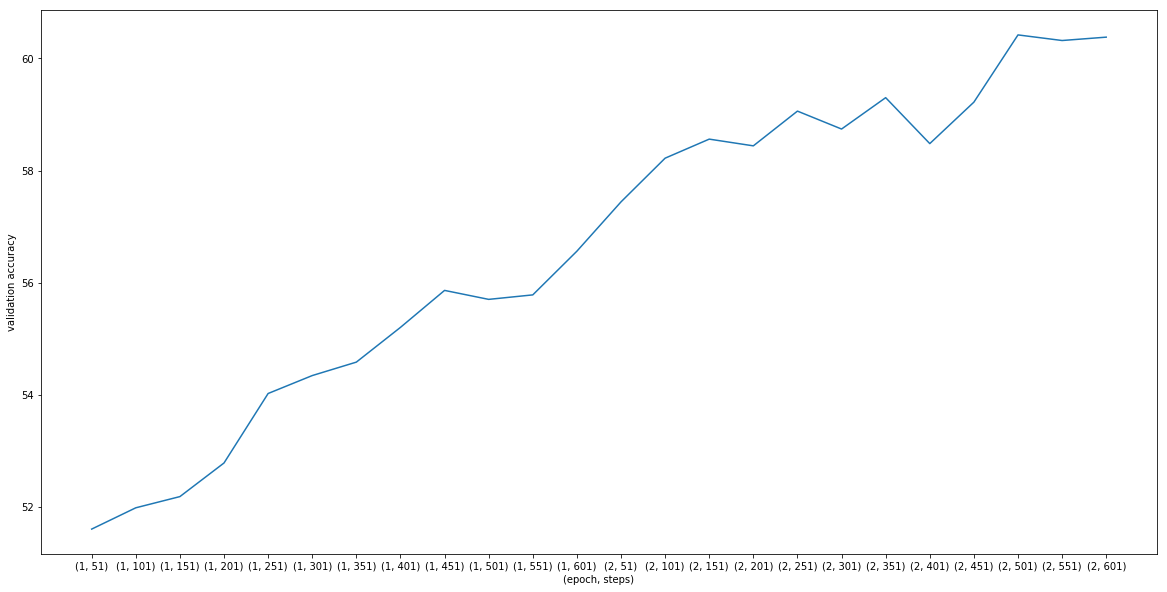

In [159]:
optimizer_lst = ['adam', 'sgd']
best_opt = tune_optimizer(optimizer_lst, train_loader, val_loader, id2token)

In [160]:
best_opt

'adam'

In [161]:
def tune_learning_rate(lr_lst, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_lr = -1
    for lr_i in lr_lst:
        
        print("current learning rate: ", lr_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, lr_i, num_epochs_default, train_loader, val_loader,id2token, best_opt)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_lr = lr_i
    return best_lr

current learning rate:  0.001
Epoch: [1/2], Step: [51/625], trainning loss: 2.622253904342651, Validation Acc: 51.86
Epoch: [1/2], Step: [101/625], trainning loss: 1.5498677372932435, Validation Acc: 52.38
Epoch: [1/2], Step: [151/625], trainning loss: 0.9136747276782989, Validation Acc: 57.6
Epoch: [1/2], Step: [201/625], trainning loss: 0.7635125422477722, Validation Acc: 56.88
Epoch: [1/2], Step: [251/625], trainning loss: 0.7202012026309967, Validation Acc: 64.76
Epoch: [1/2], Step: [301/625], trainning loss: 0.7026870000362396, Validation Acc: 63.46
Epoch: [1/2], Step: [351/625], trainning loss: 0.6865993392467499, Validation Acc: 68.88
Epoch: [1/2], Step: [401/625], trainning loss: 0.6712417435646058, Validation Acc: 65.54
Epoch: [1/2], Step: [451/625], trainning loss: 0.6576717841625214, Validation Acc: 69.06
Epoch: [1/2], Step: [501/625], trainning loss: 0.6473395180702209, Validation Acc: 73.0
Epoch: [1/2], Step: [551/625], trainning loss: 0.6303525674343109, Validation Acc: 7

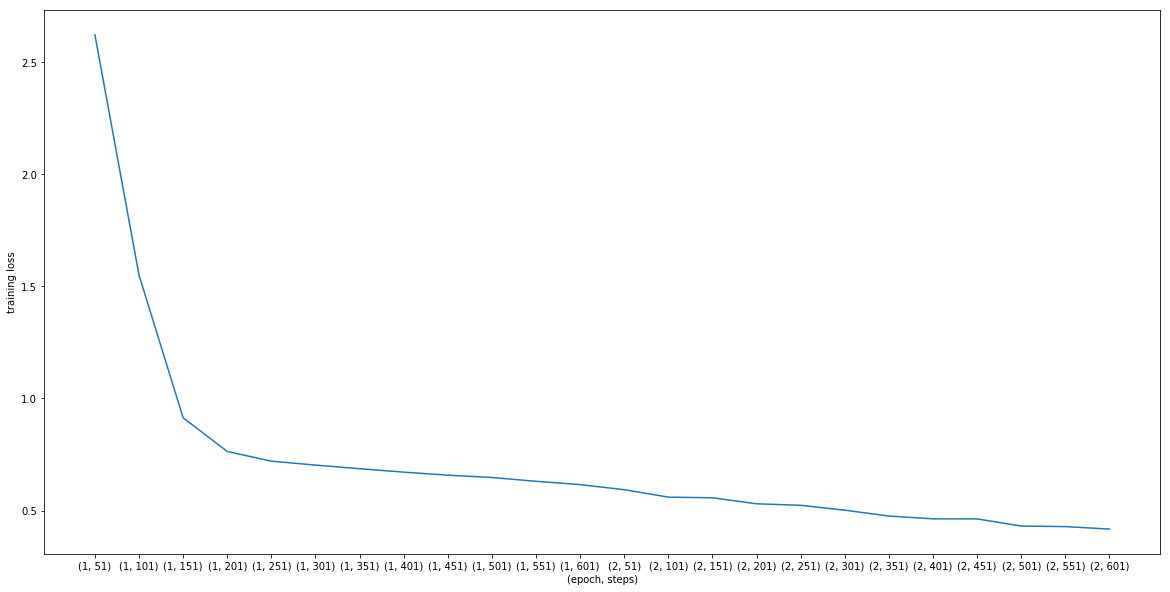

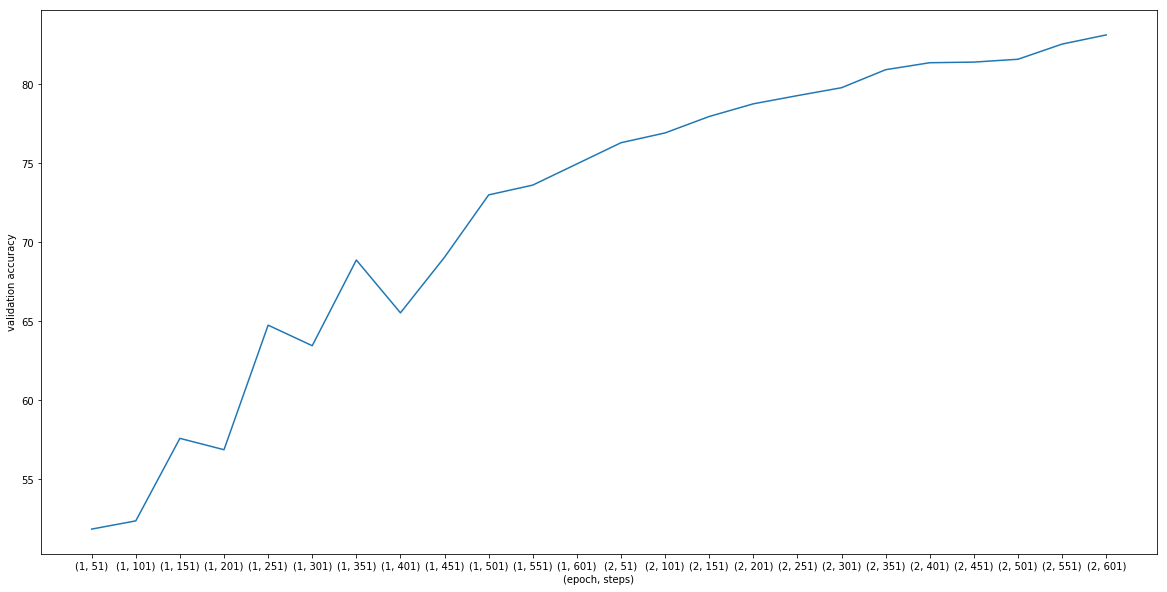

current learning rate:  0.003
Epoch: [1/2], Step: [51/625], trainning loss: 1.7886894762516021, Validation Acc: 50.24
Epoch: [1/2], Step: [101/625], trainning loss: 0.7190779614448547, Validation Acc: 52.9
Epoch: [1/2], Step: [151/625], trainning loss: 0.6777598416805267, Validation Acc: 72.0
Epoch: [1/2], Step: [201/625], trainning loss: 0.6397447407245636, Validation Acc: 73.44
Epoch: [1/2], Step: [251/625], trainning loss: 0.5924081993103028, Validation Acc: 77.7
Epoch: [1/2], Step: [301/625], trainning loss: 0.5451801800727845, Validation Acc: 79.24
Epoch: [1/2], Step: [351/625], trainning loss: 0.48500419437885284, Validation Acc: 81.52
Epoch: [1/2], Step: [401/625], trainning loss: 0.4496312987804413, Validation Acc: 82.66
Epoch: [1/2], Step: [451/625], trainning loss: 0.4215566158294678, Validation Acc: 83.94
Epoch: [1/2], Step: [501/625], trainning loss: 0.4009940785169601, Validation Acc: 85.02
Epoch: [1/2], Step: [551/625], trainning loss: 0.380615993142128, Validation Acc: 8

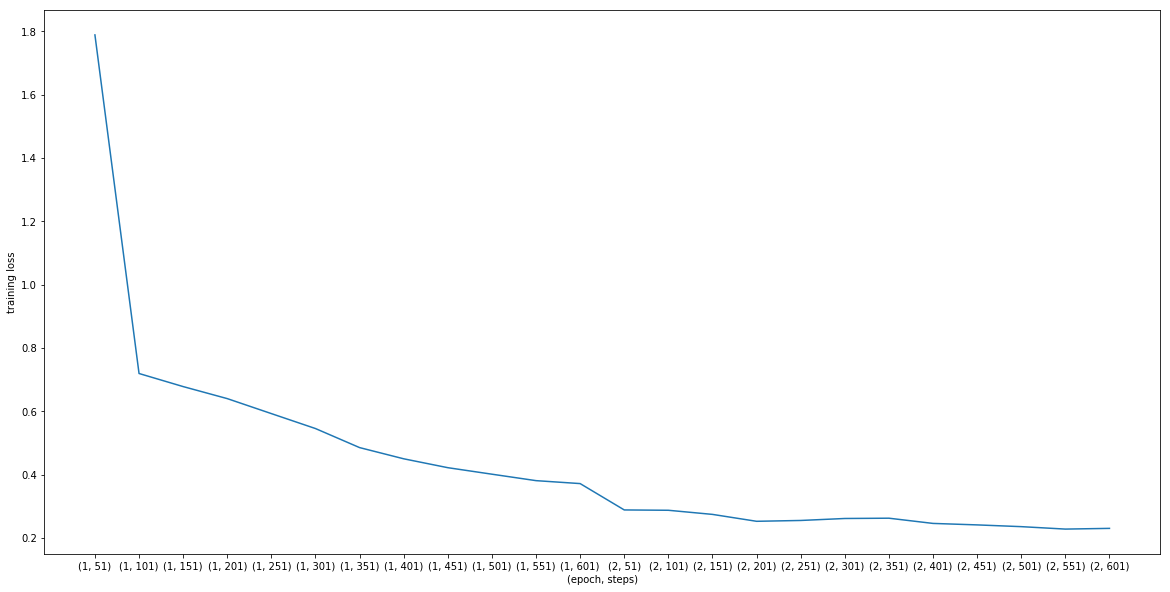

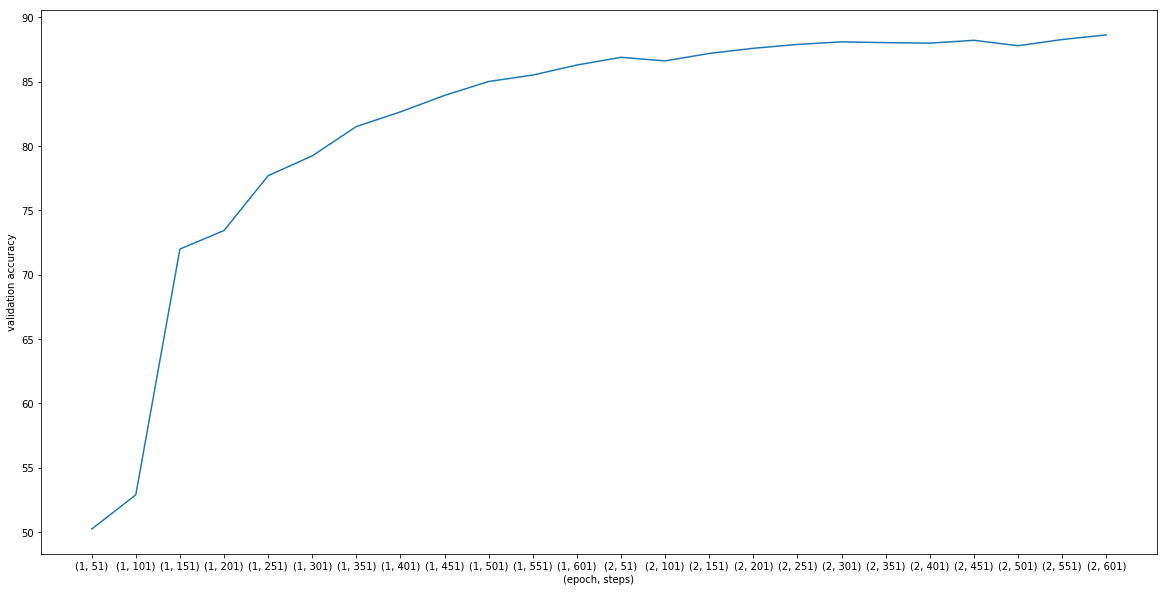

current learning rate:  0.005
Epoch: [1/2], Step: [51/625], trainning loss: 1.346724078655243, Validation Acc: 57.22
Epoch: [1/2], Step: [101/625], trainning loss: 0.665271042585373, Validation Acc: 72.52
Epoch: [1/2], Step: [151/625], trainning loss: 0.6011125993728638, Validation Acc: 76.28
Epoch: [1/2], Step: [201/625], trainning loss: 0.5246641534566879, Validation Acc: 80.24
Epoch: [1/2], Step: [251/625], trainning loss: 0.44404526472091677, Validation Acc: 82.6
Epoch: [1/2], Step: [301/625], trainning loss: 0.4086957621574402, Validation Acc: 83.32
Epoch: [1/2], Step: [351/625], trainning loss: 0.37282864183187486, Validation Acc: 84.86
Epoch: [1/2], Step: [401/625], trainning loss: 0.33455070823431016, Validation Acc: 84.82
Epoch: [1/2], Step: [451/625], trainning loss: 0.34022593289613723, Validation Acc: 86.76
Epoch: [1/2], Step: [501/625], trainning loss: 0.31858874738216403, Validation Acc: 86.98
Epoch: [1/2], Step: [551/625], trainning loss: 0.3178940933942795, Validation A

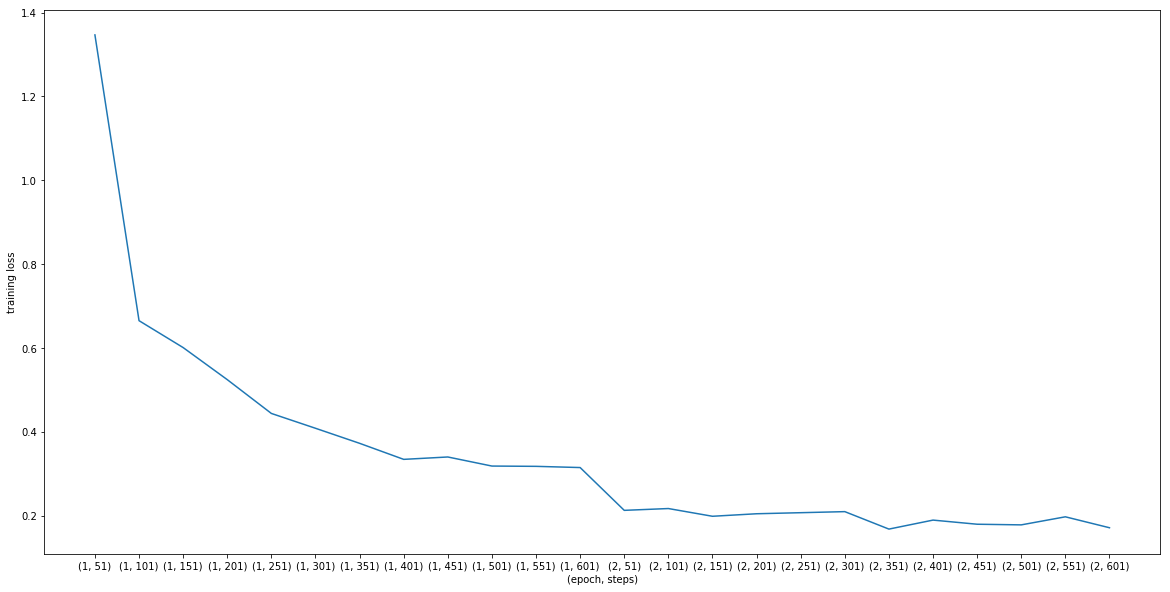

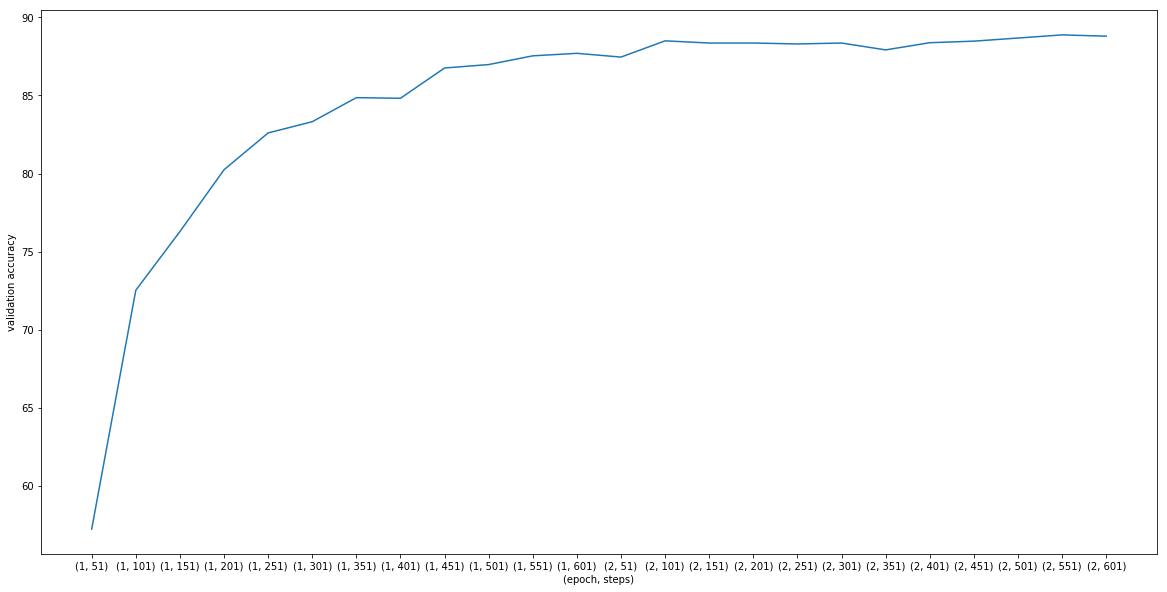

current learning rate:  0.008
Epoch: [1/2], Step: [51/625], trainning loss: 1.088544900417328, Validation Acc: 60.36
Epoch: [1/2], Step: [101/625], trainning loss: 0.6222053563594818, Validation Acc: 75.18
Epoch: [1/2], Step: [151/625], trainning loss: 0.5115500521659851, Validation Acc: 80.98
Epoch: [1/2], Step: [201/625], trainning loss: 0.42667273938655853, Validation Acc: 84.66
Epoch: [1/2], Step: [251/625], trainning loss: 0.3540535664558411, Validation Acc: 85.4
Epoch: [1/2], Step: [301/625], trainning loss: 0.3422675022482872, Validation Acc: 86.72
Epoch: [1/2], Step: [351/625], trainning loss: 0.33775885045528414, Validation Acc: 87.08
Epoch: [1/2], Step: [401/625], trainning loss: 0.3217278718948364, Validation Acc: 87.46
Epoch: [1/2], Step: [451/625], trainning loss: 0.3125174218416214, Validation Acc: 87.86
Epoch: [1/2], Step: [501/625], trainning loss: 0.31293169170618057, Validation Acc: 88.12
Epoch: [1/2], Step: [551/625], trainning loss: 0.2717542001605034, Validation Ac

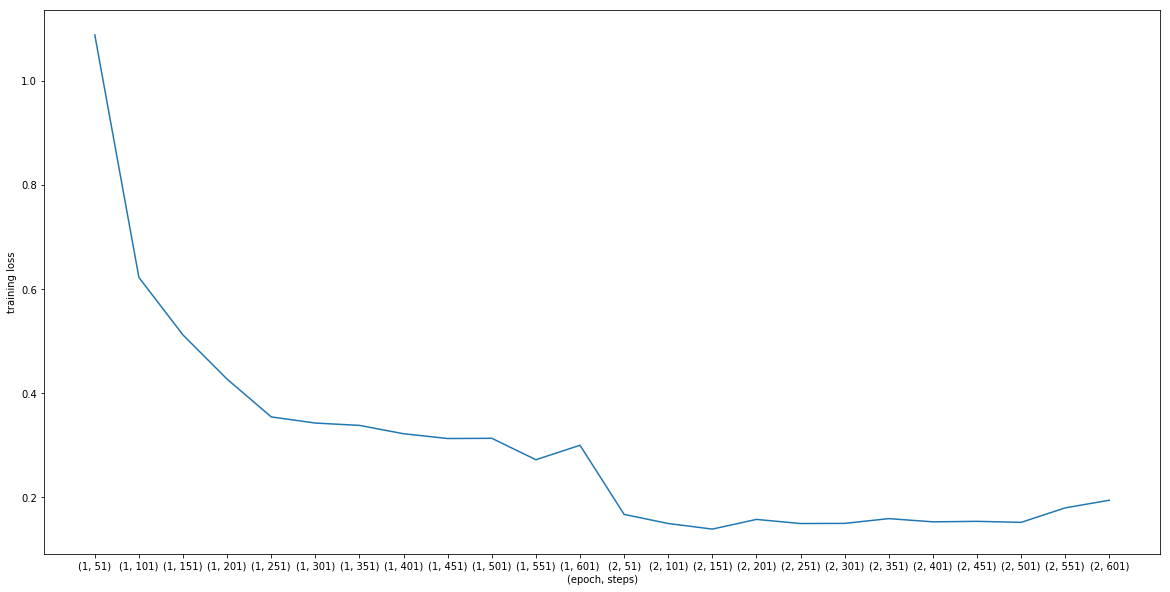

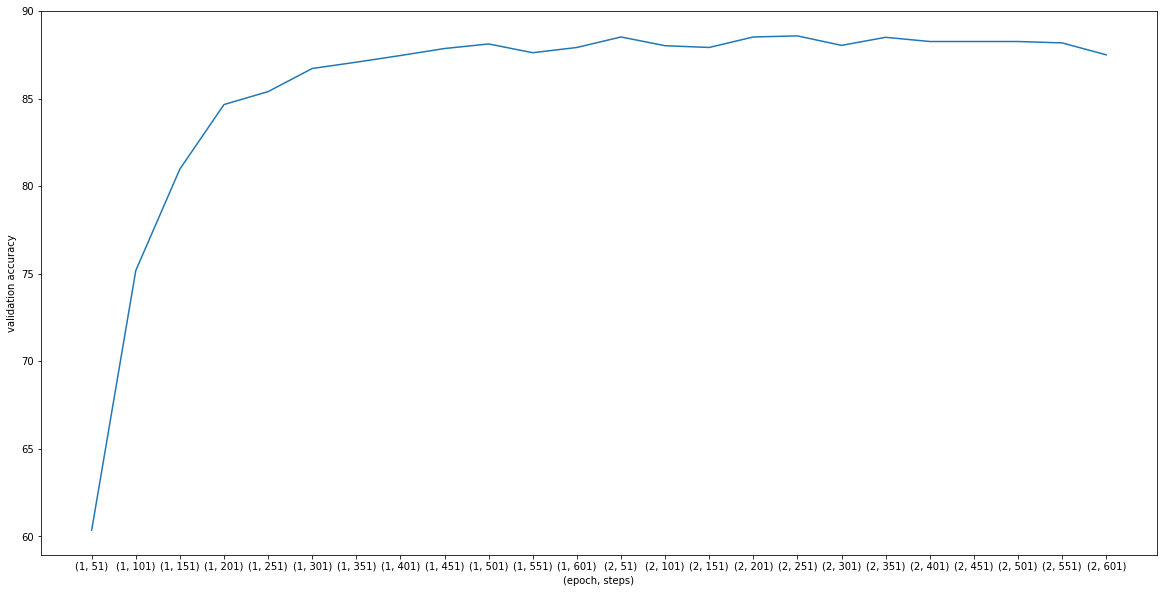

current learning rate:  0.01
Epoch: [1/2], Step: [51/625], trainning loss: 1.0383721375465393, Validation Acc: 67.18
Epoch: [1/2], Step: [101/625], trainning loss: 0.5758716303110123, Validation Acc: 77.18
Epoch: [1/2], Step: [151/625], trainning loss: 0.45272445499897, Validation Acc: 76.82
Epoch: [1/2], Step: [201/625], trainning loss: 0.390258726477623, Validation Acc: 85.02
Epoch: [1/2], Step: [251/625], trainning loss: 0.3635620006918907, Validation Acc: 86.14
Epoch: [1/2], Step: [301/625], trainning loss: 0.3491685476899147, Validation Acc: 87.06
Epoch: [1/2], Step: [351/625], trainning loss: 0.29858293265104296, Validation Acc: 87.6
Epoch: [1/2], Step: [401/625], trainning loss: 0.3048156723380089, Validation Acc: 85.96
Epoch: [1/2], Step: [451/625], trainning loss: 0.31276156097650526, Validation Acc: 88.5
Epoch: [1/2], Step: [501/625], trainning loss: 0.29124067455530167, Validation Acc: 87.88
Epoch: [1/2], Step: [551/625], trainning loss: 0.32244125828146936, Validation Acc: 

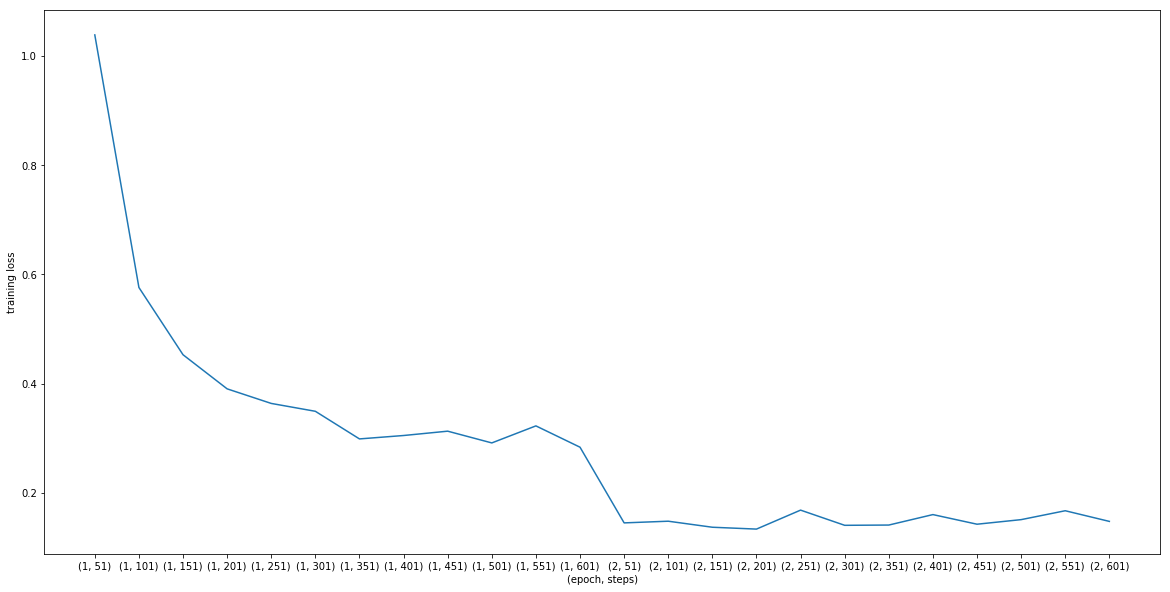

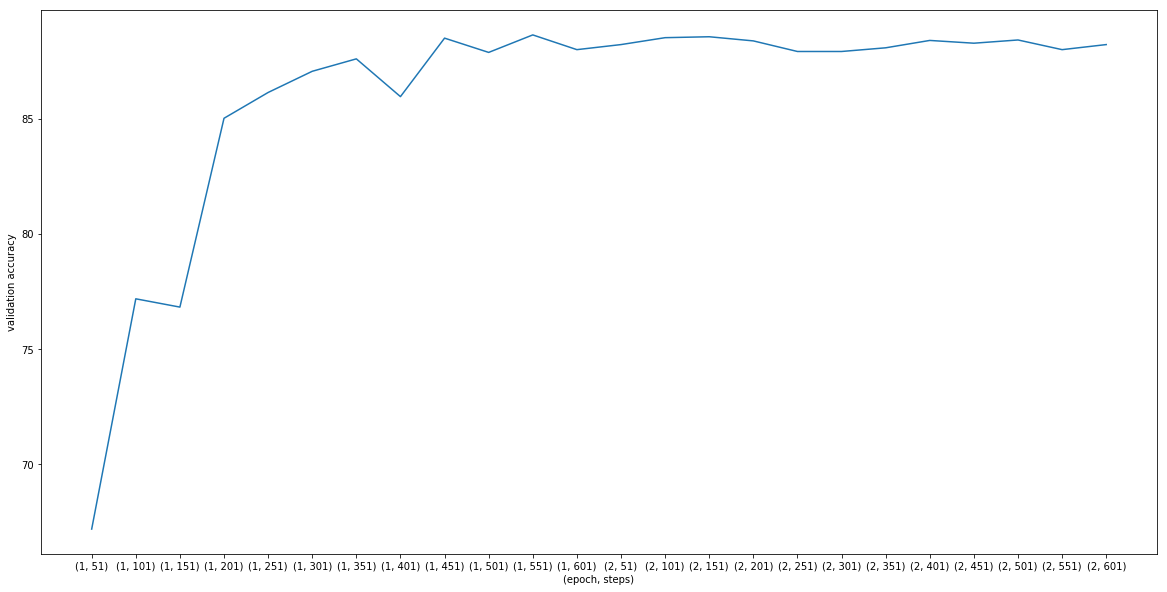

current learning rate:  0.05
Epoch: [1/2], Step: [51/625], trainning loss: 0.706617192029953, Validation Acc: 77.26
Epoch: [1/2], Step: [101/625], trainning loss: 0.39606804758310316, Validation Acc: 84.74
Epoch: [1/2], Step: [151/625], trainning loss: 0.3602865833044052, Validation Acc: 85.4
Epoch: [1/2], Step: [201/625], trainning loss: 0.3638484746217728, Validation Acc: 86.16
Epoch: [1/2], Step: [251/625], trainning loss: 0.29863769829273223, Validation Acc: 85.92
Epoch: [1/2], Step: [301/625], trainning loss: 0.3516868588328361, Validation Acc: 87.34
Epoch: [1/2], Step: [351/625], trainning loss: 0.3290511752665043, Validation Acc: 85.42
Epoch: [1/2], Step: [401/625], trainning loss: 0.29863878548145295, Validation Acc: 87.38
Epoch: [1/2], Step: [451/625], trainning loss: 0.30252275228500364, Validation Acc: 88.04
Epoch: [1/2], Step: [501/625], trainning loss: 0.31010305881500244, Validation Acc: 87.46
Epoch: [1/2], Step: [551/625], trainning loss: 0.2938110372424126, Validation A

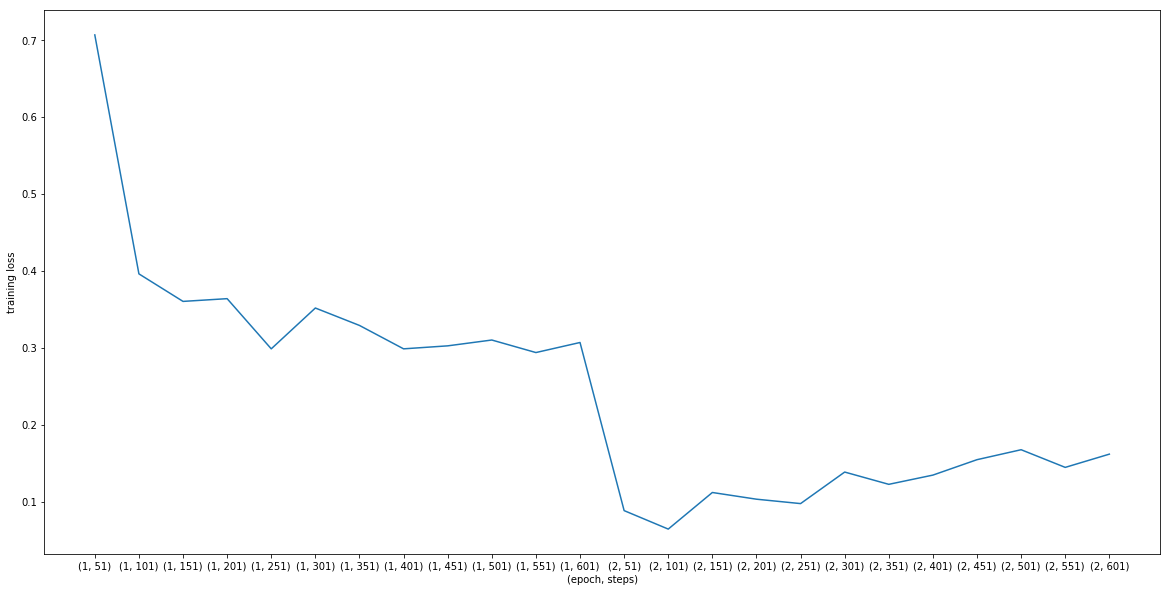

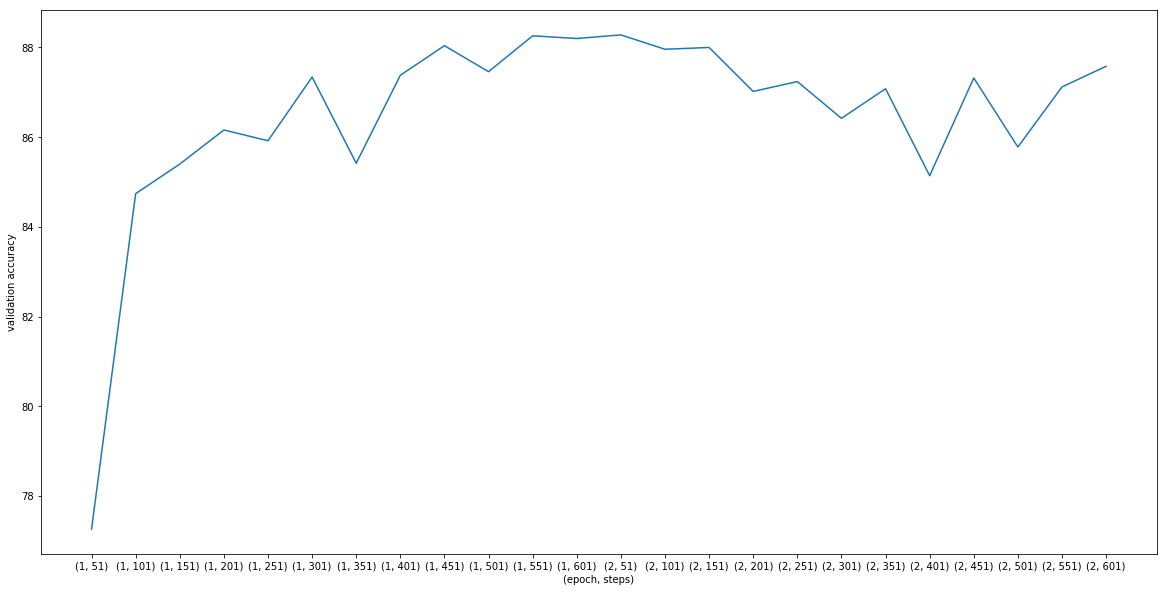

current learning rate:  0.08
Epoch: [1/2], Step: [51/625], trainning loss: 0.6069592124223709, Validation Acc: 81.1
Epoch: [1/2], Step: [101/625], trainning loss: 0.46150253117084505, Validation Acc: 77.1
Epoch: [1/2], Step: [151/625], trainning loss: 0.39713963568210603, Validation Acc: 85.12
Epoch: [1/2], Step: [201/625], trainning loss: 0.3471820110082626, Validation Acc: 82.6
Epoch: [1/2], Step: [251/625], trainning loss: 0.35177363723516464, Validation Acc: 84.78
Epoch: [1/2], Step: [301/625], trainning loss: 0.3075945395231247, Validation Acc: 86.92
Epoch: [1/2], Step: [351/625], trainning loss: 0.3631658214330673, Validation Acc: 87.04
Epoch: [1/2], Step: [401/625], trainning loss: 0.3148716829717159, Validation Acc: 87.48
Epoch: [1/2], Step: [451/625], trainning loss: 0.30935413628816605, Validation Acc: 86.82
Epoch: [1/2], Step: [501/625], trainning loss: 0.31794226825237276, Validation Acc: 86.64
Epoch: [1/2], Step: [551/625], trainning loss: 0.3306313183903694, Validation Ac

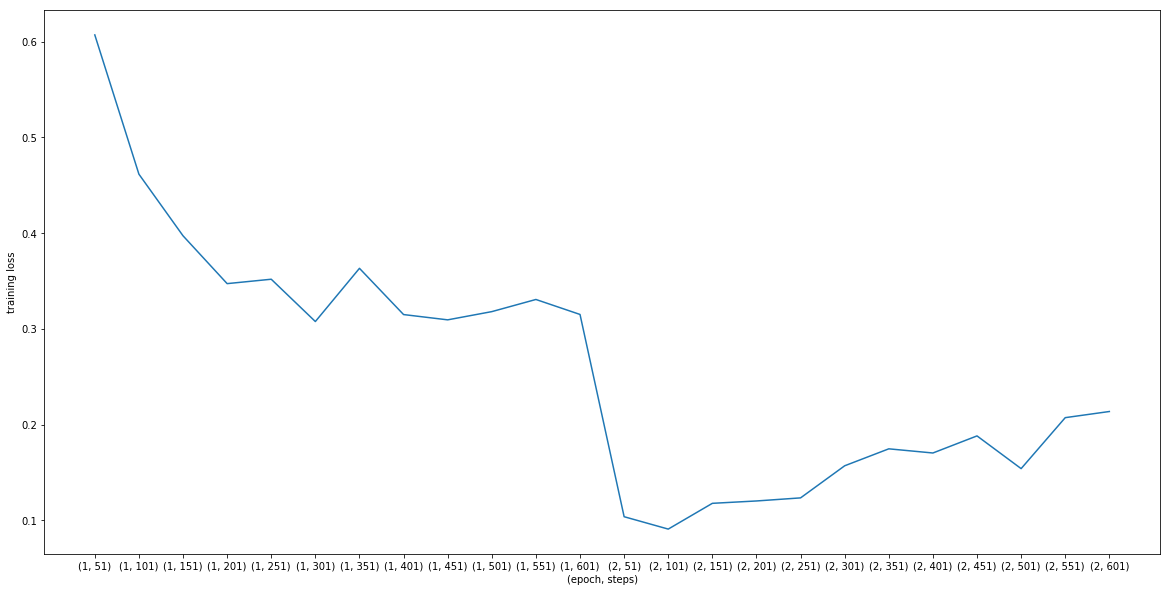

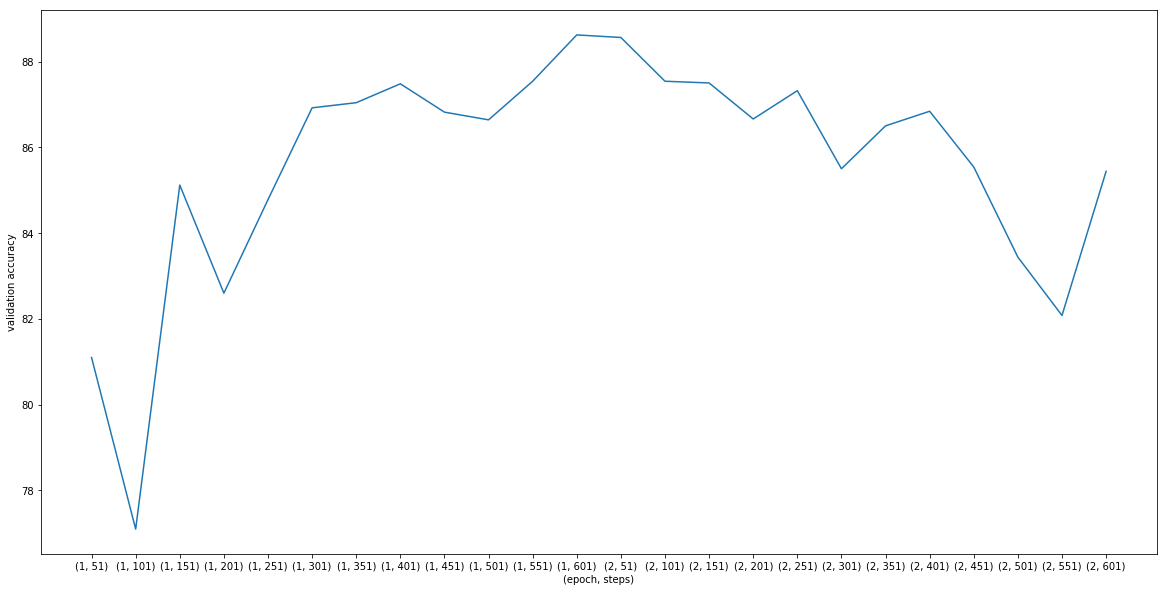

current learning rate:  0.1
Epoch: [1/2], Step: [51/625], trainning loss: 0.6354407879710198, Validation Acc: 81.52
Epoch: [1/2], Step: [101/625], trainning loss: 0.4307176202535629, Validation Acc: 83.02
Epoch: [1/2], Step: [151/625], trainning loss: 0.3694479501247406, Validation Acc: 86.26
Epoch: [1/2], Step: [201/625], trainning loss: 0.3494495448470116, Validation Acc: 86.24
Epoch: [1/2], Step: [251/625], trainning loss: 0.3213966071605682, Validation Acc: 87.06
Epoch: [1/2], Step: [301/625], trainning loss: 0.3248725819587708, Validation Acc: 87.34
Epoch: [1/2], Step: [351/625], trainning loss: 0.3437525597214699, Validation Acc: 87.74
Epoch: [1/2], Step: [401/625], trainning loss: 0.3505042500793934, Validation Acc: 88.12
Epoch: [1/2], Step: [451/625], trainning loss: 0.3369078728556633, Validation Acc: 87.4
Epoch: [1/2], Step: [501/625], trainning loss: 0.33906261026859286, Validation Acc: 87.84
Epoch: [1/2], Step: [551/625], trainning loss: 0.3391586098074913, Validation Acc: 

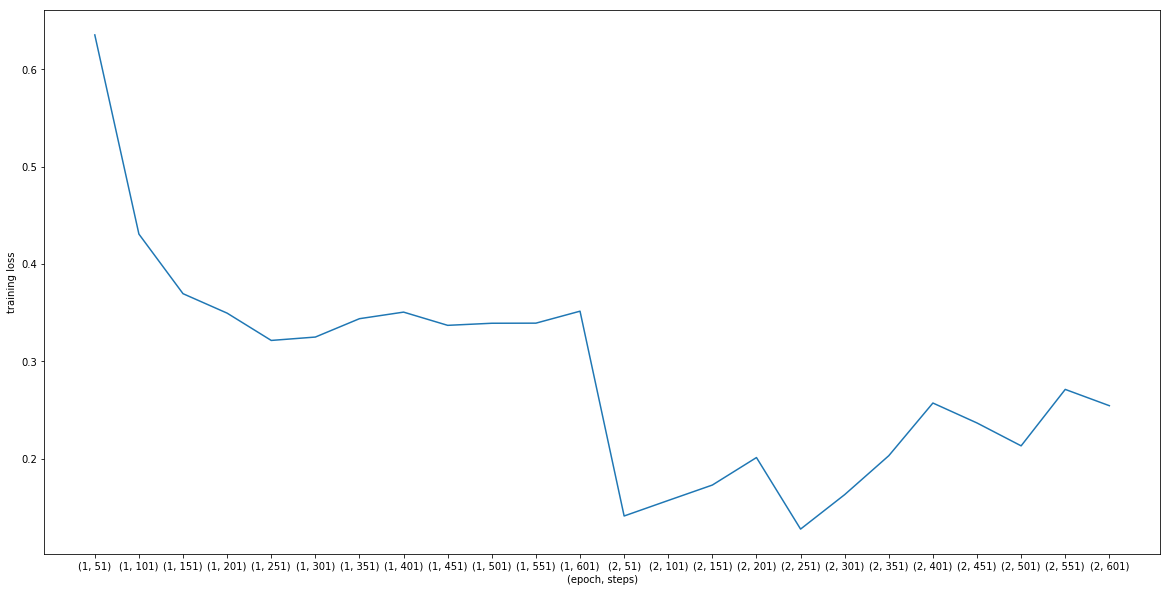

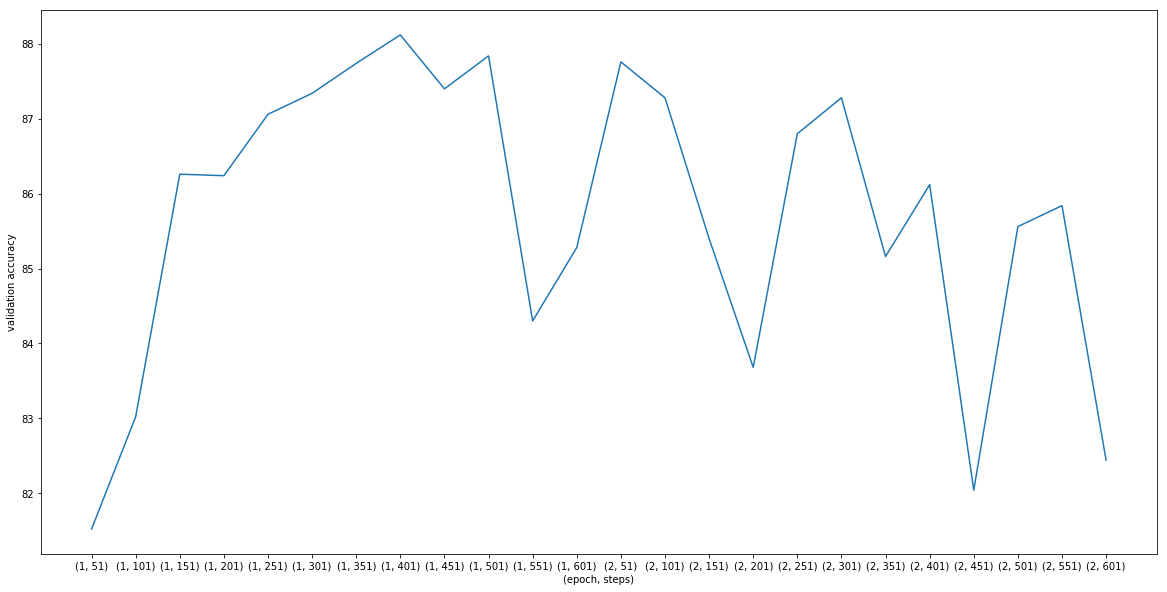

In [165]:
lr_lst = [0.001, 0.003, 0.005, 0.008,0.01, 0.05, 0.08, 0.1]
best_lr = tune_learning_rate(lr_lst, train_loader, val_loader, id2token)

In [166]:
best_lr

0.003

In [170]:
def tune_linear_annealing(is_la, train_loader, val_loader, id2token):
    max_val_acc = -1
    best_la = -1
    for la_i in is_la:
        
        print("reduce learning: ", la_i)
        val_acc_i, train_loss, val_accuracy, epoch_list = run_model(best_emb, best_lr, num_epochs_default, train_loader, val_loader,id2token, best_opt, la_i)
        print ("Val Acc {}".format(val_acc_i))
        
        #plot
        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), train_loss)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("training loss")
        plt.show()

        plt.figure(figsize=(20,10))
        plt.plot(range(len(epoch_list)), val_accuracy)
        plt.xticks(range(len(epoch_list)), epoch_list)
        plt.xlabel("(epoch, steps)")
        plt.ylabel("validation accuracy")
        plt.show()
        
        if val_acc_i > max_val_acc:
            max_val_acc = val_acc_i
            best_la = la_i
    return best_la

reduce learning:  True
Epoch: [1/2], Step: [51/625], trainning loss: 1.7226269626617432, Validation Acc: 54.94
Epoch: [1/2], Step: [101/625], trainning loss: 0.7140535485744476, Validation Acc: 66.24
Epoch: [1/2], Step: [151/625], trainning loss: 0.6684859037399292, Validation Acc: 72.22
Epoch: [1/2], Step: [201/625], trainning loss: 0.622050529718399, Validation Acc: 74.98
Epoch: [1/2], Step: [251/625], trainning loss: 0.5804520100355148, Validation Acc: 77.28
Epoch: [1/2], Step: [301/625], trainning loss: 0.5216461354494095, Validation Acc: 79.02
Epoch: [1/2], Step: [351/625], trainning loss: 0.47020117700099945, Validation Acc: 80.82
Epoch: [1/2], Step: [401/625], trainning loss: 0.4354947370290756, Validation Acc: 82.86
Epoch: [1/2], Step: [451/625], trainning loss: 0.4320211839675903, Validation Acc: 83.76
Epoch: [1/2], Step: [501/625], trainning loss: 0.40462938040494917, Validation Acc: 84.68
Epoch: [1/2], Step: [551/625], trainning loss: 0.3581801387667656, Validation Acc: 85.3

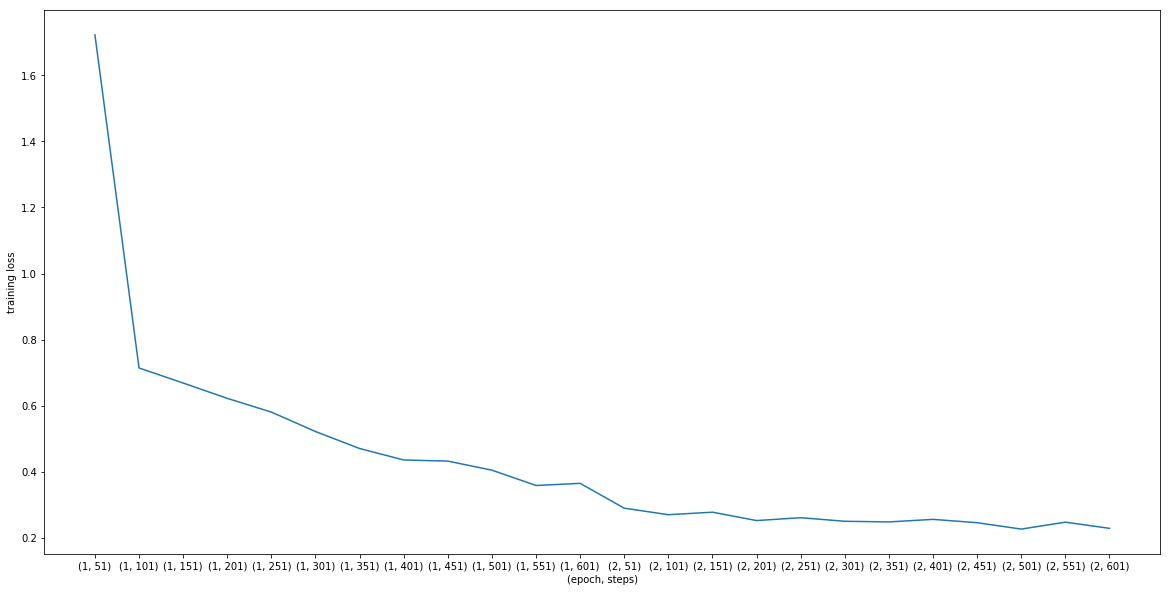

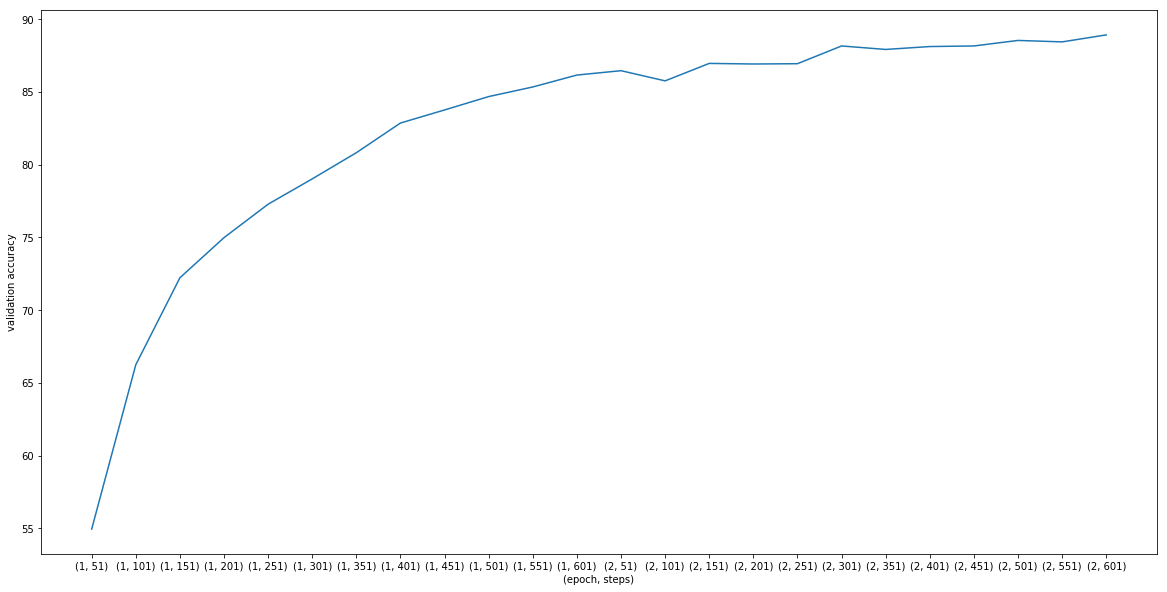

reduce learning:  False
Epoch: [1/2], Step: [51/625], trainning loss: 1.6985726845264435, Validation Acc: 53.24
Epoch: [1/2], Step: [101/625], trainning loss: 0.715033028125763, Validation Acc: 62.32
Epoch: [1/2], Step: [151/625], trainning loss: 0.6678569257259369, Validation Acc: 61.92
Epoch: [1/2], Step: [201/625], trainning loss: 0.6294046604633331, Validation Acc: 74.34
Epoch: [1/2], Step: [251/625], trainning loss: 0.5846152663230896, Validation Acc: 76.36
Epoch: [1/2], Step: [301/625], trainning loss: 0.535245104432106, Validation Acc: 80.68
Epoch: [1/2], Step: [351/625], trainning loss: 0.46180325508117676, Validation Acc: 81.0
Epoch: [1/2], Step: [401/625], trainning loss: 0.4435058152675629, Validation Acc: 83.1
Epoch: [1/2], Step: [451/625], trainning loss: 0.41925082087516785, Validation Acc: 84.36
Epoch: [1/2], Step: [501/625], trainning loss: 0.387354229092598, Validation Acc: 84.96
Epoch: [1/2], Step: [551/625], trainning loss: 0.3828738564252853, Validation Acc: 85.34
E

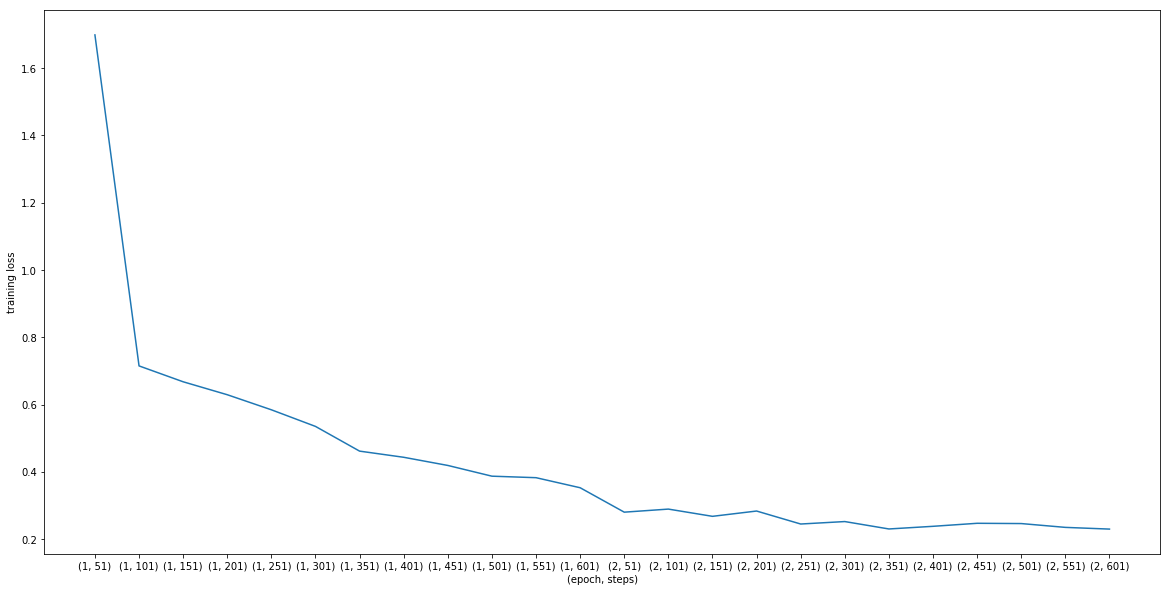

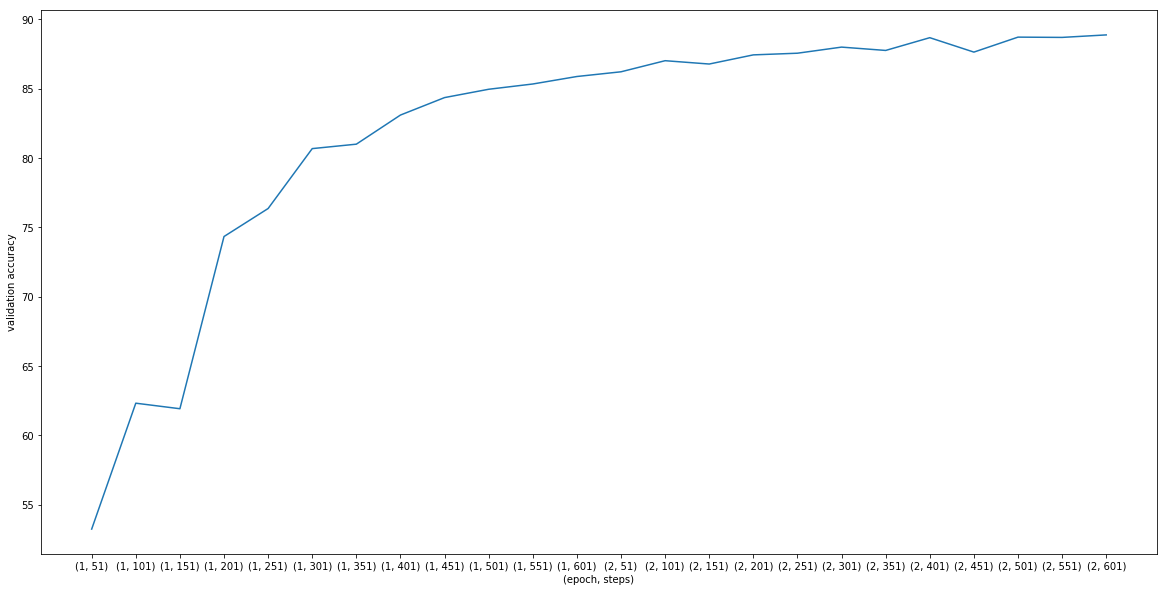

In [171]:
is_la = [True, False]
best_la = tune_linear_annealing(is_la, train_loader, val_loader, id2token)

In [172]:
best_la

True

In [174]:
num_epochs = num_epochs_default
model = BagOfWords(len(id2token), best_emb)
criterion = torch.nn.CrossEntropyLoss()  
if best_opt == "adam":
    optimizer = torch.optim.Adam(model.parameters(), lr=best_lr)
else:
    optimizer = torch.optim.SGD(model.parameters(), lr=best_lr)

if best_la:
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=(lambda ep: 0.95**ep))

for epoch in range(num_epochs):
        running_loss = 0
        if best_la:
            scheduler.step()
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i > 0 and i % 50 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                train_loss.append(running_loss/50)
                val_accuracy.append(val_acc)
                epoch_list.append(str((epoch+1, i+1)))
                print('Epoch: [{}/{}], Step: [{}/{}], trainning loss: {}, Validation Acc: {}'.format( 
                   epoch+1, num_epochs, i+1, len(train_loader), running_loss/50,val_acc))
                running_loss = 0



        # print accuracy every epoch

val_acc_i = test_model(val_loader, model)
print ("Val Acc {}".format(val_acc_i))

test_acc_i = test_model(test_loader, model)
print ("test Acc {}".format(test_acc_i))

Epoch: [1/2], Step: [51/625], trainning loss: 1.7046479964256287, Validation Acc: 60.96
Epoch: [1/2], Step: [101/625], trainning loss: 0.7061361074447632, Validation Acc: 65.58
Epoch: [1/2], Step: [151/625], trainning loss: 0.6616731286048889, Validation Acc: 68.7
Epoch: [1/2], Step: [201/625], trainning loss: 0.621439745426178, Validation Acc: 75.1
Epoch: [1/2], Step: [251/625], trainning loss: 0.5807682824134827, Validation Acc: 78.32
Epoch: [1/2], Step: [301/625], trainning loss: 0.5157546025514602, Validation Acc: 78.66
Epoch: [1/2], Step: [351/625], trainning loss: 0.48121391117572787, Validation Acc: 81.6
Epoch: [1/2], Step: [401/625], trainning loss: 0.44057645082473756, Validation Acc: 82.8
Epoch: [1/2], Step: [451/625], trainning loss: 0.4047207713127136, Validation Acc: 83.84
Epoch: [1/2], Step: [501/625], trainning loss: 0.40249181985855104, Validation Acc: 85.14
Epoch: [1/2], Step: [551/625], trainning loss: 0.36647690981626513, Validation Acc: 85.86
Epoch: [1/2], Step: [60

## Exercise 1
### Try training the model with larger embedding size and for larger number of epochs
### Also plot the training curves of the model

## Exercise 2:
### Try downloading IMDB Large Movie Review Dataset that is used for Assignment 1 http://ai.stanford.edu/~amaas/data/sentiment/
### and tokenize it

## Exercise 3:
### If you have time, after tokenizing the dataset try training Bag-of-Words model on it and report your initial results
### on validation set.